# Libraries and basic environment preparation 

In [3]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [4]:
# to make screen wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
# installation for topic modelling
#! pip install -U gensim

In [6]:
# installation NPL engine
#! pip install -U spacy==2.2.3

In [7]:
# download the language English from spacy because the text for processing is in English
#!python -m spacy download en_core_web_sm

In [8]:
# import NPL libraries from spacy
import spacy
from spacy.language import Language
from spacy.lang.es.stop_words import STOP_WORDS


In [9]:
# import topic modelling libraries from gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [10]:
#pip install python-Levenshtein
#pip install --upgrade setuptools

In [11]:
# time control
from tqdm import tqdm_notebook as tqdm

In [12]:
pd.options.display.max_colwidth=1500

In [13]:
#pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
#pip install demoji

In [16]:
import demoji
#demoji.download_codes()

In [17]:
#nltk.download('stopwords')

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# for stopwords
import en_core_web_sm

# Import datasets and basic data exploration

In [98]:
# import dataset (the whole data set including both sheets)
all_data = pd.read_excel('TweetsDataSet.xls', sheet_name = None) # read all sheets

In [99]:
all_data.keys()

dict_keys(['General', 'national headquarters'])

In [100]:
all_data.values()

dict_values([                        id         UserName           To  \
0                858406312     Anna_Cummins          NaN   
1                862791257  PlasticfreeBeth          NaN   
2                862791257  PlasticfreeBeth          NaN   
3                862953608  PlasticfreeBeth          NaN   
4                862953608  PlasticfreeBeth          NaN   
...                    ...              ...          ...   
44558  1277673213997301760            Tesco  debsandells   
44559  1277688326833811456  EnvirHealthNews          NaN   
44560  1277708766515990528           5gyres          NaN   
44561  1277711199631745024            Tesco  racheybabey   
44562  1277751212465684480  PlasticPollutes          NaN   

                                                                                                                                                                                                                                                                          

In [101]:
# extract each single sheets as a single dataframe
general_data = all_data["General"]
nationalHQ_data = all_data["national headquarters"]

In [102]:
general_data

,id,UserName,To,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder
0,858406312,Anna_Cummins,NaN,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist
1,862791257,PlasticfreeBeth,NaN,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,NGO
2,862791257,PlasticfreeBeth,NaN,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist
3,862953608,PlasticfreeBeth,NaN,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,NGO
4,862953608,PlasticfreeBeth,NaN,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist
...,...,...,...,...,...,...,...,...,...,...
44558,1277673213997301760,Tesco,debsandells,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,2020-06-29 18:40:06+00:00,0,0,NaN,NaN,Companies
44559,1277688326833811456,EnvirHealthNews,NaN,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",2020-06-29 19:40:10+00:00,1,3,NaN,#plastic #PlasticPollution,Scientific
44560,1277708766515990528,5gyres,NaN,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,2020-06-29 21:01:23+00:00,1,1,NaN,NaN,NGO
44561,1277711199631745024,Tesco,racheybabey,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",2020-06-29 21:11:03+00:00,0,0,NaN,NaN,Companies


In [103]:
nationalHQ_data

,Unnamed: 0,Unnamed: 0.1,id,UserName,To,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder
0,0,0,3532585761,CocaCola_GB,NaN,"RT @SimsGalore i found 7 bottles of empty coke and that was 7 @cokezone codes &lt;- that's one way to reach a lot of points, and recycle!",2009-08-25 10:47:14+00:00,0,0,@simsgalore @CokeZone,NaN,Companies
1,1,0,3982501108,CocaCola_GB,NaN,"Where did this sudden sun come from?! Stay cool with this 'Chicks dig recycling' T-shirt, only 150 points http://bit.ly/1VT71U",2009-09-14 15:54:03+00:00,0,0,NaN,NaN,Companies
2,2,0,1601020081741824,CocaCola_GB,DrEvil,@DrEvil recycling is very important to us,2010-11-08 11:44:47+00:00,0,0,@DrEvil,NaN,Companies
3,3,0,47309385105543168,CocaCola_GB,DJMOG1,"@djmog1 I don't think we buy bottles back at this stage, but definitely recycle them we are big into recycling!",2011-03-14 14:53:31+00:00,0,0,@DJMOG1,NaN,Companies
4,4,0,70160884667924480,CocaCola_GB,stuartgarside,@stuartgarside we have the glass ones at the moment but currently have no plans for plastic ones. http://ow.ly/4VFum,2011-05-16 16:17:13+00:00,0,0,@stuartgarside,NaN,Companies
...,...,...,...,...,...,...,...,...,...,...,...,...
1169,1169,1,1224984792913121280,PGUK,NaN,"We've been shortlisted in @edie Sustainability Leader Awards for the Circular Economy Innovation of the Year category! P&amp;G's Sustainability Technologist, @Giandebelder, is driving the HolyGrail 2.0 project, aimed at developing technology to revolutionise recycling #edieawards2020",2020-02-05 09:15:08+00:00,3,14,@edie @giandebelder,#edieawards2020,Companies
1170,1170,0,1240313983783112704,PGUK,NaN,"On #GlobalRecyclingDay we’re proud to support @Wrap_UK's @clearonplastics. We must cut through the confusion around plastics, waste &amp; recycling so we can make more sustainable choices and create a world where plastic is valued and doesn’t pollute the environment #clearonplastics",2020-03-18 16:27:52+00:00,2,4,@WRAP_UK @clearonplastics,#GlobalRecyclingDay #clearonplastics,Companies
1171,1171,1,1240202513049141248,PGUK,NaN,"Today we're celebrating #GlobalRecyclingDay, a day to increase awareness of the importance of recycling to help protect our natural resources and keep materials in the circular economy. Read more about our efforts to create a more sustainable future https://www.pg.co.uk/environmental-sustainability/",2020-03-18 09:04:55+00:00,1,2,NaN,#GlobalRecyclingDay,Companies
1172,1172,2,1235183368742096896,PGUK,NaN,"As one of the founding signatories of @WRAP_UK we're delighted to support their new @clearonplastics campaign. It's critical that we work together to cut through the confusion around plastics, waste and recycling and work together to educate and improve sustainable plastics 🌱",2020-03-04 12:40:38+00:00,7,17,@WRAP_UK @clearonplastics,NaN,Companies


### *From now on, I only use the first sheet

In [104]:
df = general_data

In [105]:
df

,id,UserName,To,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder
0,858406312,Anna_Cummins,NaN,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist
1,862791257,PlasticfreeBeth,NaN,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,NGO
2,862791257,PlasticfreeBeth,NaN,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist
3,862953608,PlasticfreeBeth,NaN,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,NGO
4,862953608,PlasticfreeBeth,NaN,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist
...,...,...,...,...,...,...,...,...,...,...
44558,1277673213997301760,Tesco,debsandells,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,2020-06-29 18:40:06+00:00,0,0,NaN,NaN,Companies
44559,1277688326833811456,EnvirHealthNews,NaN,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",2020-06-29 19:40:10+00:00,1,3,NaN,#plastic #PlasticPollution,Scientific
44560,1277708766515990528,5gyres,NaN,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,2020-06-29 21:01:23+00:00,1,1,NaN,NaN,NGO
44561,1277711199631745024,Tesco,racheybabey,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",2020-06-29 21:11:03+00:00,0,0,NaN,NaN,Companies


In [106]:
df.columns

Index(['id', 'UserName', 'To', 'Text', 'Date', 'Retweets', 'Favorites',
       'Mentions', 'HashTags', 'stakeHolder'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44563 entries, 0 to 44562
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           44563 non-null  int64 
 1   UserName     44563 non-null  object
 2   To           21288 non-null  object
 3   Text         44563 non-null  object
 4   Date         44563 non-null  object
 5   Retweets     44563 non-null  int64 
 6   Favorites    44563 non-null  int64 
 7   Mentions     10949 non-null  object
 8   HashTags     12697 non-null  object
 9   stakeHolder  44563 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


Some observations: 

1) the column "id" and "To" are irrelevant for my analysis --> delete column 

2) There are some duplicated rows such as the row 9 & 10 --> need cleaning (fist define the category for stakeholder then clean).

3) The column "Mentions" doesnt always show all the mentioned accounts, and I'm afraid so does the column "Hashtags", I'll create another two columns for the corresponding information

4) for later regressions, construct the dataframe by individual - time as double index

In [108]:
# 1) delete the column "id"
del df['id']
del df['To']
df.head()

,UserName,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist
1,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,NGO
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist
3,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,NGO
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist


In [109]:
# 2) define stakeholders
df.stakeHolder.unique()

array(['Activist', 'NGO', 'Companies', 'Scientific', 'Institution',
       'Lobbyist'], dtype=object)

In [110]:
stakeH = ['Activist', 'NGO', 'Scientific', 'Institution','Lobbyist', 'Companies']

In [111]:
# 2) define which username belngs to which category
df.UserName[df.stakeHolder=="Activist"].unique() # correctly allocated, though 1 less than powerpoint

array(['Anna_Cummins', 'PlasticfreeBeth', 'Maqueda', 'DRexplore',
       'celinecousteau', 'GordonJMillar', 'DRussoInnovate', 'CapnMoore',
       'SongsofJBrowne', 'ElizabethRoyte', 'AnnaTurns'], dtype=object)

In [112]:
df.UserName[df.stakeHolder=="NGO"].unique() 
# wrap_uk is institutions based on powerpoint and is also recognized as instutions in the data --> correction a)
# the NGO thedailyocean not here
# plasticfreebeth act both as NGO and activist (based on data and powerpoint) --> what to do? b)

array(['PlasticfreeBeth', 'Greenpeace', 'HealTheBay', 'NatGeo',
       'thedailyocean', 'captainplanetfd', 'PlasticPollutes', '5gyres',
       'WRAP_UK', 'NonToxicRev', 'NoPlasticStraws', 'bahaplasmvmnt',
       'FutureFrogmen'], dtype=object)

In [113]:
df.UserName[df.stakeHolder=="Companies"].unique() 
# more than in the powerpoint

array(['Starbucks', 'CocaCola', 'marksandspencer', 'PepsiCo', 'amazon',
       'McDonalds', 'Walmart', 'CocaColaCo', 'ProcterGamble', 'Unilever',
       'Nestle', 'Tesco', 'McDonaldsCorp', 'waitrose', 'AldiUK',
       'AldiUSA', 'LidlGB'], dtype=object)

In [114]:
df.UserName[df.stakeHolder=='Scientific'].unique() 
# tiemeythys not here, otherwise correct 

array(['wallacejnichols', 'Scripps_Ocean', 'ASUBiodesign',
       'janettewallis', 'EnvirHealthNews', 'Algalita', 'AbiBarrows',
       'AdvScientists', 'PlasticOceansUS'], dtype=object)

In [115]:
df.UserName[df.stakeHolder=='Institution'].unique() 
# correct

array(['WRAP_UK', 'EndPlasticWaste'], dtype=object)

In [116]:
df.UserName[df.stakeHolder=='Lobbyist'].unique() 
#correct

array(['7thgenadvisors', 'LeslieTamminen'], dtype=object)

In [117]:
# corrections for 2)
# a)
df["stakeHolder"][df["UserName"] == 'WRAP_UK']='Institution'

<ipython-input-117-3fdaa9e22861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stakeHolder"][df["UserName"] == 'WRAP_UK']='Institution'


In [118]:
# b) I decide to allocate plasticfreebeth as activist and delete all duplicated rows as NGO
df.drop_duplicates(subset ="Text", keep='last', inplace = True)

In [119]:
df.head(10)

,UserName,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist
10,PlasticfreeBeth,@organicmania Basil turning black in a plastic bag... another reason to skip the plastic. Hurray!,2008-07-24 22:08:41+00:00,0,0,@organicmania,NaN,Activist
12,PlasticfreeBeth,@fishlamp Thanks for writing about the Brita recycling campaign on your blog: http://tinyurl.com/5rf85e,2008-07-25 04:45:35+00:00,0,0,NaN,NaN,Activist
14,PlasticfreeBeth,"Blue Sky Cleaners: Non-toxic and Plastic-free?: Nowadays, I stick to buying clothes that can be w.. http://tinyurl.com/6kxzyt",2008-07-25 19:00:48+00:00,0,0,NaN,NaN,Activist
16,PlasticfreeBeth,"Michael's so in love with our friends' plastic cat litter scoop, he wants to marry it. Gotta find a non-plastic scoop that's just as good.",2008-07-27 15:28:25+00:00,0,0,NaN,NaN,Activist
18,PlasticfreeBeth,"Year 2, Week 6 Results: .2 oz of plastic waste.: I took my mini plastic stash (.2 ounces! Yes!) o.. http://tinyurl.com/5aq8pw",2008-07-28 02:00:56+00:00,0,0,NaN,NaN,Activist


In [120]:
from datetime import datetime, timedelta
df['Date2'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [121]:
df

,UserName,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder,Date2
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist,2008-07-14 21:35:34+00:00
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist,2008-07-19 15:34:17+00:00
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist,2008-07-19 20:50:56+00:00
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist,2008-07-21 03:00:33+00:00
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist,2008-07-24 18:31:11+00:00
...,...,...,...,...,...,...,...,...,...
44558,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,2020-06-29 18:40:06+00:00,0,0,NaN,NaN,Companies,2020-06-29 18:40:06+00:00
44559,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",2020-06-29 19:40:10+00:00,1,3,NaN,#plastic #PlasticPollution,Scientific,2020-06-29 19:40:10+00:00
44560,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,2020-06-29 21:01:23+00:00,1,1,NaN,NaN,NGO,2020-06-29 21:01:23+00:00
44561,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",2020-06-29 21:11:03+00:00,0,0,NaN,NaN,Companies,2020-06-29 21:11:03+00:00


In [122]:
df['Date2']=df['Date2'].apply(lambda x: x.strftime('%Y'))

from datetime import datetime, timedelta
df['Date2'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df['Date2']=df['Date2'].apply(lambda x: x.strftime('%Y'))

In [123]:
df

,UserName,Text,Date,Retweets,Favorites,Mentions,HashTags,stakeHolder,Date2
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist,2008
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist,2008
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist,2008
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist,2008
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist,2008
...,...,...,...,...,...,...,...,...,...
44558,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,2020-06-29 18:40:06+00:00,0,0,NaN,NaN,Companies,2020
44559,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",2020-06-29 19:40:10+00:00,1,3,NaN,#plastic #PlasticPollution,Scientific,2020
44560,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,2020-06-29 21:01:23+00:00,1,1,NaN,NaN,NGO,2020
44561,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",2020-06-29 21:11:03+00:00,0,0,NaN,NaN,Companies,2020


In [124]:
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter)
import matplotlib.ticker as mtick

Text(0.5, 1.0, 'Allocation of Time')

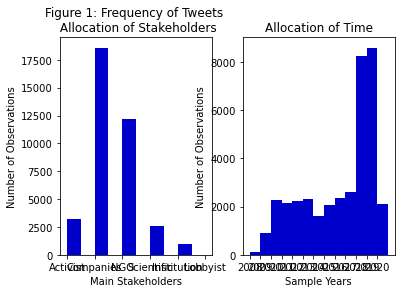

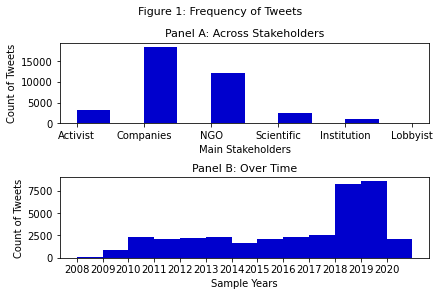

In [139]:
fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].hist(df["stakeHolder"],histtype="bar", color = "mediumblue")
axs[0].set_title('Panel A: Across Stakeholders', fontsize =11)
axs[0].set_xlabel('Main Stakeholders')
axs[0].set_ylabel('Count of Tweets')
fig.suptitle('Figure 1: Frequency of Tweets', fontsize=11)

axs[1].hist(df["Date2"],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], histtype="bar", color = "mediumblue")
axs[1].set_xlabel('Sample Years')
axs[1].set_title('Panel B: Over Time',fontsize =11)
axs[1].set_ylabel('Count of Tweets')

plt.savefig('Figure 1.pdf')

In [128]:
# 3) I'll add the columns for mentions and hashtags later, so now I simply reanme them so that I can compare both (i prefer the names used in the original data,
df = df.rename(columns={'Mentions': 'checkMen','HashTags':'checkHash'})

In [129]:
df.head()

,UserName,Text,Date,Retweets,Favorites,checkMen,checkHash,stakeHolder,Date2
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist,2008
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist,2008
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist,2008
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist,2008
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist,2008


In [130]:
df.shape

(37577, 9)

## A) Finding tweets that themselves have reweeted

In [131]:
# make a new column to highlight retweets
df['is_retweet'] = df['Text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

1152

In [132]:
# since there is also a column called "Reweets", check whether the number corresponds to each other
sum(df.Retweets)

454706

Observations:

Obviously they dont match to each other, the reason is simple: the fomer tests whether the tweet under the column text is reweeted, but the latter counts how many times the tweet under the column text is retweeted.
These accounts seems not to prefer to use RT, but more original tweets, considering we have in total 38716 tweets. And the total number for them to be reweeted is much higher: 458446. --> absolutely interesting to analyze which topic can lead to higher prob of being retweetd.


In [133]:
df.head()

,UserName,Text,Date,Retweets,Favorites,checkMen,checkHash,stakeHolder,Date2,is_retweet
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist,2008,False
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist,2008,False
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist,2008,False
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist,2008,False
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist,2008,False


In [134]:
 # number of unique retweets
df.loc[df['is_retweet']].Text.unique().size
# so all the tweets that were retweeted by accounts are unique, I stopped anaylysing the retweet characteristics for my data, as it's not interesting anymore.

1152

## B) Dealing with mentions and hashtags

In [135]:
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [136]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['mentioned'] = df.Text.apply(find_mentioned)
df['hashtags'] = df.Text.apply(find_hashtags)

In [137]:
df.head(10)

,UserName,Text,Date,Retweets,Favorites,checkMen,checkHash,stakeHolder,Date2,is_retweet,mentioned,hashtags
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,NaN,#blogher08,Activist,2008,False,[],[#blogher08]
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,NaN,#blogher08,Activist,2008,False,[],[#blogher08]
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]
10,PlasticfreeBeth,@organicmania Basil turning black in a plastic bag... another reason to skip the plastic. Hurray!,2008-07-24 22:08:41+00:00,0,0,@organicmania,NaN,Activist,2008,False,[@organicmania],[]
12,PlasticfreeBeth,@fishlamp Thanks for writing about the Brita recycling campaign on your blog: http://tinyurl.com/5rf85e,2008-07-25 04:45:35+00:00,0,0,NaN,NaN,Activist,2008,False,[@fishlamp],[]
14,PlasticfreeBeth,"Blue Sky Cleaners: Non-toxic and Plastic-free?: Nowadays, I stick to buying clothes that can be w.. http://tinyurl.com/6kxzyt",2008-07-25 19:00:48+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]
16,PlasticfreeBeth,"Michael's so in love with our friends' plastic cat litter scoop, he wants to marry it. Gotta find a non-plastic scoop that's just as good.",2008-07-27 15:28:25+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]
18,PlasticfreeBeth,"Year 2, Week 6 Results: .2 oz of plastic waste.: I took my mini plastic stash (.2 ounces! Yes!) o.. http://tinyurl.com/5aq8pw",2008-07-28 02:00:56+00:00,0,0,NaN,NaN,Activist,2008,False,[],[]


In [138]:
#  based on the first 10 observations, I decided to delete the checkMen and checkHash 
df = df.drop(df.loc[:, 'checkMen':'checkHash'].columns, axis = 1)

In [139]:
df.head()

,UserName,Text,Date,Retweets,Favorites,stakeHolder,Date2,is_retweet,mentioned,hashtags
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,Activist,2008,False,[],[]
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,Activist,2008,False,[],[#blogher08]
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,Activist,2008,False,[],[#blogher08]
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,Activist,2008,False,[],[]
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,Activist,2008,False,[],[]


## C) Keyword Correlations in Text

### C1) hashtags

#### hashtags for the whole data, i.e. all stakeholder

In [155]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_dfAll = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [156]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_dfAll = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_dfAll.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [157]:
# number of unique hashtags
flattened_hashtags_dfAll['hashtag'].unique().size

3027

In [158]:
# count of appearances of each hashtag
popular_hashtagsAll = flattened_hashtags_dfAll.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtagsAll["pct_counts"] = popular_hashtagsAll["counts"] / sum(popular_hashtagsAll["counts"]) 


In [159]:
popular_hashtagsAll.head(20)

,hashtag,counts,pct_counts
0,#plastic,1604,0.099049
1,#plasticpollutes,1474,0.091021
2,#ScaleforGood,780,0.048166
3,#Plastic,391,0.024145
4,#BreakFreeFromPlastic,384,0.023712
5,#plasticpollution,359,0.022169
6,#recycling,339,0.020934
7,#pollution,304,0.018772
8,#ocean,186,0.011486
9,#fb,173,0.010683


In [160]:
popular_hashtagsAll.to_csv("Table1.csv")

Observations:
top1, 2, 4, 5, 7 are all about plastic pollution while #scaleforGood, #recycling and #pollution stay a bit different. --> might be interesting to analyze this, because different stakeholders might have emphasized hashtags differently

#### hashtags for each single stakeholder

In [161]:
# stakeH = ['Activist', 'NGO', 'Companies', 'Scientific', 'Institution','Lobbyist']
# create a list of dataframes for each stakeholder
df_stakeH_list = []
for i in range (0,6):
    df_stakeH = df[df["stakeHolder"]==stakeH[i]]
    df_stakeH_list.append(df_stakeH)
#hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]

In [162]:
# for each dataframe in the df_stakeH_list: take the rows from the hashtag columns where there are actually hashtags
stakeH_list = []
for i in range(0,6):
    hashtags_list_df = df_stakeH_list[i].loc[df_stakeH_list[i].hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
    stakeH_list.append(hashtags_list_df)

In [163]:
stakeH_list[0].head()

,hashtags
2,[#blogher08]
4,[#blogher08]
332,[#gno]
334,[#gno]
336,[#gno]


In [164]:
# create dataframe where each use of hashtag gets its own row
flt_list = []
for i in range(0,6):
    flattened_hashtags_df = pd.DataFrame(
        [hashtag for hashtags_list in stakeH_list[i].hashtags
        for hashtag in hashtags_list],
        columns=['hashtag'])
    flt_list.append(flattened_hashtags_df)

In [165]:
flt_list[0].head(10)

,hashtag
0,#blogher08
1,#blogher08
2,#gno
3,#gno
4,#gno
5,#gno
6,#gno
7,#gno
8,#gno
9,#gno


In [166]:
# number of unique hashtags for each stakeholder
unique_list = []
for i in range(0,6):
    temp = flt_list[i]['hashtag'].unique().size
    unique_list.append(temp)

In [167]:
unique_list

[380, 2016, 541, 281, 15, 328]

In [168]:
# count of appearances of each hashtag
popular_list = []
for i in range(0,6):
    popular_hashtags = flt_list[i].groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
    popular_hashtags[f"pct_counts for {stakeH[i]}"] = popular_hashtags["counts"] / sum(popular_hashtags["counts"])
    popular_list.append(popular_hashtags)

In [169]:
popular_df = pd.concat(popular_list,axis = 1)

In [170]:
popular_df.head(10)

,hashtag,counts,pct_counts for Activist,hashtag,counts,pct_counts for NGO,hashtag,counts,pct_counts for Scientific,hashtag,counts,pct_counts for Institution,hashtag,counts,pct_counts for Lobbyist,hashtag,counts,pct_counts for Companies
0,#plastic,236.0,0.157229,#plasticpollutes,1432,0.139110,#plastic,219.0,0.152189,#recycling,126.0,0.106239,#Nature,3.0,0.142857,#ScaleforGood,780.0,0.444952
1,#fb,162.0,0.107928,#plastic,1080,0.104915,#plasticpollution,71.0,0.049340,#UKPlasticsPact,84.0,0.070826,#climatecrisis,2.0,0.095238,#recycling,37.0,0.021107
2,#holisticmoms,96.0,0.063957,#BreakFreeFromPlastic,382,0.037109,#pollution,44.0,0.030577,#EndPlasticWaste,59.0,0.049747,#coronavirus,2.0,0.095238,#sustainability,29.0,0.016543
3,#noplastic,72.0,0.047968,#Plastic,305,0.029629,#plasticpollutes,41.0,0.028492,#foodwaste,52.0,0.043845,#environment,2.0,0.095238,#DreamMachine,28.0,0.015973
4,#healthychild,51.0,0.033977,#plasticpollution,276,0.026812,#recycling,41.0,0.028492,#plastic,50.0,0.042159,#pandemic,2.0,0.095238,#BeatPlasticPollution,25.0,0.014261
5,#MyPlasticfreeLifeArchive,43.0,0.028648,#pollution,243,0.023606,#Plastic,41.0,0.028492,#circulareconomy,30.0,0.025295,#BYOBag,1.0,0.047619,#recycle,22.0,0.012550
6,#Plastic,35.0,0.023318,#ocean,161,0.015640,#oceans,24.0,0.016678,#localauthorities,27.0,0.022766,#Environment,1.0,0.047619,#HopeThisHelps,21.0,0.011979
7,#LTKH,34.0,0.022652,#noplasticstraws,135,0.013114,#microplastics,20.0,0.013899,#recycle,27.0,0.022766,#MiBolsa,1.0,0.047619,#packaging,21.0,0.011979
8,#plasticfreebeth,23.0,0.015323,#recycling,132,0.012823,#GoodNews,17.0,0.011814,#RecycleWeek,26.0,0.021922,#MyBag,1.0,0.047619,#CircularEconomy,20.0,0.011409
9,#EcoTipTue,22.0,0.014657,#breakfreefromplastic,122,0.011852,#BlueMind,15.0,0.010424,#recycleweek,21.0,0.017707,#PlasticFreeNYC,1.0,0.047619,#Nestl,18.0,0.010268


In [171]:
popular_df.to_csv("Table1(b)")

Observations:
as expected, hot hashtags differ among stakeholders. For example, the top hashtags for companies are more related to reclycling than plastic pollution for activist and NGO.

### C2) retweeted: based on information above, no interest in exploring this aspect for retweeted ("is_retweet")

### C3) mentioned

#### mentioned for the whole data, i.e. all stakeholder

In [172]:
# take the rows from the findmentioned columns where there are actually hashtags
mentioned_list_df = df.loc[
                       df.mentioned.apply(
                           lambda mentioned_list: mentioned_list !=[]
                       ),['mentioned']]

In [173]:
mentioned_list_df.head()

,mentioned
10,[@organicmania]
12,[@fishlamp]
25,[@thegoodhuman]
27,[@packagingdiva]
33,[@daNanner]


In [174]:
# create dataframe where each use of mentioned gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

In [175]:
flattened_mentioned_df.head(10)

,mentioned
0,@organicmania
1,@fishlamp
2,@thegoodhuman
3,@packagingdiva
4,@daNanner
5,@osl
6,@christiearlotta
7,@StephAgresta
8,@nwjerseyliz
9,@TheCanaryReport


In [176]:
# number of unique mentions
flattened_mentioned_df['mentioned'].unique().size

5751

In [177]:
# count of appearances of each mentioned
popular_mentioned = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_mentioned["pct"] = popular_mentioned["counts"]/sum(popular_mentioned["counts"])

In [178]:
popular_mentioned.head(20)

,mentioned,counts,pct
0,@McDonaldsCorp,441,0.034989
1,@PlasticPollutes,338,0.026817
2,@Beyond_Plastic,194,0.015392
3,@PlasticfreeBeth,156,0.012377
4,@recycle_now,125,0.009917
5,@NoPlasticStraws,108,0.008569
6,@plasticpollutes,82,0.006506
7,@earthisland,80,0.006347
8,@implicitweet,76,0.006030
9,@CocaCola,75,0.005950


Observations:
1) interesting to know which stakeholders mention the top mentioned --> need for exploration

#### mentioned for each single stakeholder

In [179]:
# for each dataframe in the df_stakeH_list: take the rows from the mentioned columns where there are actually mentions
stakeH1_list = []
for i in range(0,6):
    mentioned_list_df = df_stakeH_list[i].loc[
                       df_stakeH_list[i].mentioned.apply(
                           lambda mentioned_list: mentioned_list !=[]
                       ),['mentioned']]
    stakeH1_list.append(mentioned_list_df)

In [180]:
stakeH1_list[0].head(5)

,mentioned
10,[@organicmania]
12,[@fishlamp]
25,[@thegoodhuman]
27,[@packagingdiva]
33,[@daNanner]


In [181]:
# create dataframe where each use of hashtag gets its own row
flt1_list = []
for i in range(0,6):
    flattened_mentioned_df = pd.DataFrame(
        [mentioned for mentioned_list in stakeH1_list[i].mentioned
        for mentioned in mentioned_list],
        columns=['mentioned'])
    flt1_list.append(flattened_mentioned_df)

In [182]:
flt1_list[0].head(5)

,mentioned
0,@organicmania
1,@fishlamp
2,@thegoodhuman
3,@packagingdiva
4,@daNanner


In [183]:
# number of unique hashtags for each stakeholder
unique1_list = []
for i in range(0,6):
    temp1 = flt1_list[i]['mentioned'].unique().size
    unique1_list.append(temp1)

In [184]:
unique1_list

[1181, 2178, 778, 262, 7, 1922]

In [185]:
# count of appearances of each hashtag
popular1_list = []
for i in range(0,6):
    popular1_mentioned = flt1_list[i].groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
    popular1_mentioned[f"pct_counts for {stakeH[i]}"] = popular1_mentioned["counts"] / sum(popular1_mentioned["counts"])
    popular1_list.append(popular1_mentioned)

In [186]:
popular1_df = pd.concat(popular1_list,axis = 1)

In [187]:
popular1_df.head(10)

,mentioned,counts,pct_counts for Activist,mentioned,counts,pct_counts for NGO,mentioned,counts,pct_counts for Scientific,mentioned,counts,pct_counts for Institution,mentioned,counts,pct_counts for Lobbyist,mentioned,counts,pct_counts for Companies
0,@PlasticPollutes,225.0,0.087719,@NoPlasticStraws,106,0.021196,@guardian,46.0,0.032532,@recycle_now,125.0,0.168464,@AsmMuratsuchi,1.0,0.142857,@McDonaldsCorp,441.0,0.153391
1,@Beyond_Plastic,112.0,0.043665,@Beyond_Plastic,82,0.016397,@PlasticPollutes,43.0,0.030410,@WRAP_UK,43.0,0.057951,@AssemblymemberEdChau,1.0,0.142857,@RECYPartnership,16.0,0.005565
2,@PlasticfreeBeth,92.0,0.035867,@Nestle,73,0.014597,@pluckfastic,33.0,0.023338,@LFHW_UK,22.0,0.029650,@ChicoBag,1.0,0.142857,@PepsiCo,10.0,0.003478
3,@earthisland,70.0,0.027290,@PlasticPollutes,70,0.013997,@petemyers,25.0,0.017680,@BBCRadio4,20.0,0.026954,@NYCMayorsOffice,1.0,0.142857,@pepsico,10.0,0.003478
4,@susanmcp1,40.0,0.015595,@CocaCola,66,0.013197,@Reuters,21.0,0.014851,@MarcusGover,19.0,0.025606,@NYGovCuomo,1.0,0.142857,@EKOCYCLE,9.0,0.003130
5,@plasticpollutes,30.0,0.011696,@PlasticfreeBeth,62,0.012398,@EnvirHealthNews,16.0,0.011315,@LizGoodwin,16.0,0.021563,@PlaNYC,1.0,0.142857,@WoodlandTrust,8.0,0.002783
6,@simransethi,20.0,0.007797,@implicitweet,52,0.010398,@implicitweet,16.0,0.011315,@circulareconomy,16.0,0.021563,@asmSusanEggman,1.0,0.142857,@EndPlasticWaste,7.0,0.002435
7,@beyond_plastic,20.0,0.007797,@NRDC,38,0.007598,@plasticpollutes,15.0,0.010608,@PeterJMaddox,15.0,0.020216,NaN,NaN,NaN,@CirculateCap,7.0,0.002435
8,@wallacejnichols,18.0,0.007018,@plasticpollutes,37,0.007399,@FastCompany,15.0,0.010608,@loveyourclothes,11.0,0.014825,NaN,NaN,NaN,@NewPlasticsEcon,6.0,0.002087
9,@bewastewise,18.0,0.007018,@NatGeo,36,0.007199,@wallacejnichols,14.0,0.009901,@BBCBreakfast,10.0,0.013477,NaN,NaN,NaN,@deano_nev,6.0,0.002087


Observations:

interesting to know why the top 10 are mentioned, a lot official accounts like to @ themselves, but if other reason than that --> explore later

### D) Correlations between hashtags

In [83]:
# take hashtags which appear at least this amount of times
min_appearance = 83
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtagsAll[
                           popular_hashtagsAll.counts>=min_appearance
                           ]['hashtag'])

In [84]:
popular_hashtags_set

{'#BPA',
 '#BreakFreeFromPlastic',
 '#Plastic',
 '#ScaleforGood',
 '#TEDxGP2',
 '#UKPlasticsPact',
 '#breakfreefromplastic',
 '#fb',
 '#green',
 '#holisticmoms',
 '#noplasticstraws',
 '#ocean',
 '#oceans',
 '#plastic',
 '#plasticpollutes',
 '#plasticpollution',
 '#pollution',
 '#recycle',
 '#recycling'}

In [85]:
# make a new column with only the popular hashtags
hashtags_list_dfAll['popular_hashtags'] = hashtags_list_dfAll.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_dfAll.loc[
            hashtags_list_dfAll.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [86]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [87]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [88]:
# calculate the correlation matrix
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
correlations = hashtag_matrix.corr()



In [89]:
correlations

,#UKPlasticsPact,#holisticmoms,#recycling,#BreakFreeFromPlastic,#ScaleforGood,#breakfreefromplastic,#ocean,#pollution,#BPA,#noplasticstraws,#recycle,#plasticpollutes,#TEDxGP2,#Plastic,#green,#plasticpollution,#plastic,#fb,#oceans
#UKPlasticsPact,1.000000,-0.014620,0.015524,-0.030295,-0.044768,-0.016834,-0.020726,-0.007018,-0.015836,-0.017581,-0.010915,-0.066038,-0.015087,-0.007193,-0.013725,-0.010967,0.014996,-0.019966,-0.014057
#holisticmoms,-0.014620,1.000000,-0.030528,-0.032671,-0.048280,-0.018154,-0.022351,-0.028867,-0.017079,-0.018960,-0.021210,-0.071218,-0.016270,-0.032988,-0.014802,-0.031520,-0.075241,-0.021532,-0.015159
#recycling,0.015524,-0.030528,1.000000,-0.063261,-0.093483,-0.035152,-0.039110,-0.049305,-0.033069,-0.036712,-0.027929,-0.134545,-0.031504,-0.060947,0.027022,-0.033618,-0.108165,-0.041693,-0.023308
#BreakFreeFromPlastic,-0.030295,-0.032671,-0.063261,1.000000,-0.100044,-0.037619,-0.042389,-0.056714,-0.035390,-0.039289,-0.039825,-0.134945,-0.033715,-0.062843,-0.030672,-0.062447,-0.143619,-0.044619,-0.020024
#ScaleforGood,-0.044768,-0.048280,-0.093483,-0.100044,1.000000,-0.055591,-0.068444,-0.088394,-0.052297,-0.058058,-0.064948,-0.218080,-0.049822,-0.101014,-0.045325,-0.096520,-0.230400,-0.065935,-0.046420
#breakfreefromplastic,-0.016834,-0.018154,-0.035152,-0.037619,-0.055591,1.000000,-0.025736,-0.027898,-0.019665,0.033454,-0.024422,0.078303,-0.018734,-0.037984,-0.017043,-0.021482,-0.078702,-0.024793,-0.017455
#ocean,-0.020726,-0.022351,-0.039110,-0.042389,-0.068444,-0.025736,1.000000,0.151926,-0.024211,-0.026879,-0.024241,-0.098732,-0.023065,-0.031189,-0.004521,-0.000106,0.179852,-0.030525,-0.021490
#pollution,-0.007018,-0.028867,-0.049305,-0.056714,-0.088394,-0.027898,0.151926,1.000000,-0.031269,-0.034713,-0.038833,-0.126867,-0.029789,-0.011162,-0.007587,-0.038496,0.222428,-0.039423,0.067573
#BPA,-0.015836,-0.017079,-0.033069,-0.035390,-0.052297,-0.019665,-0.024211,-0.031269,1.000000,-0.020538,-0.022975,-0.077145,0.021187,-0.000513,-0.016033,-0.034143,-0.011392,-0.023324,-0.016421
#noplasticstraws,-0.017581,-0.018960,-0.036712,-0.039289,-0.058058,0.033454,-0.026879,-0.034713,-0.020538,1.000000,-0.025506,0.062923,-0.019566,-0.039670,-0.017800,-0.028432,-0.090481,-0.025894,-0.018230


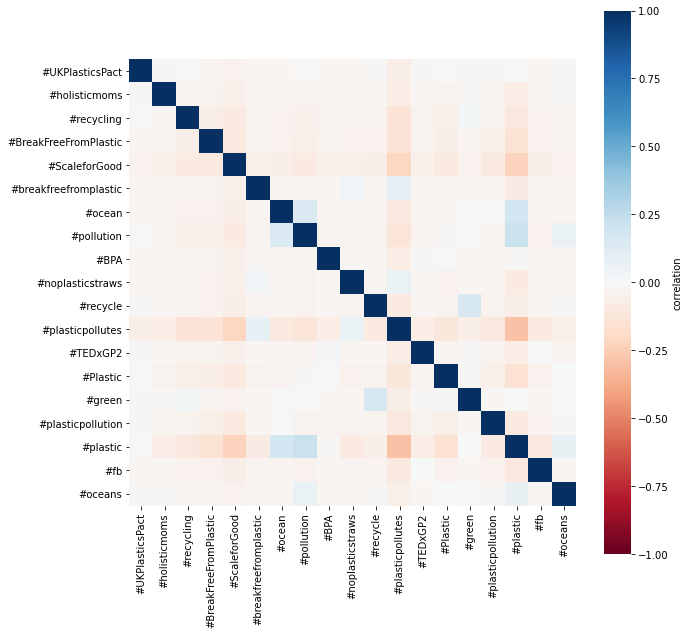

In [90]:
import seaborn as sns
# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

# Topic modelling

The important information to know is that these techniques each take a matrix which is similar to the hashtag_vector_df dataframe that we created above. Every row represents a tweet and every column represents a word. The entry at each row-column position is the number of times that a given word appears in the tweet for the row, this is called the bag-of-words format. For the word-set [#photography, #pets, #funny, #day], the tweet ‘#funny #funny #photography #pets’ would be [1,1,2,0] in vector form.
Using this matrix the topic modelling algorithms will form topics from the words. Each of the algorithms does this in a different way, but the basics are that the algorithms look at the co-occurrence of words in the tweets and if words often appearing in the same tweets together, then these words are likely to form a topic together. The algorithm will form topics which group commonly co-occurring words. A topic in this sense, is just list of words that often appear together and also scores associated with each of these words in the topic. The higher the score of a word in a topic, the higher that word’s importance in the topic. Each topic will have a score for every word found in tweets, in order to make sense of the topics we usually only look at the top words - the words with low scores are irrelevant.

## A) build corpus and dictionary

In [91]:
df

,UserName,Text,Date,Retweets,Favorites,stakeHolder,is_retweet,mentioned,hashtags
0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,2008-07-14 21:35:34+00:00,0,0,Activist,False,[],[]
2,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,2008-07-19 15:34:17+00:00,0,0,Activist,False,[],[#blogher08]
4,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,2008-07-19 20:50:56+00:00,0,0,Activist,False,[],[#blogher08]
6,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",2008-07-21 03:00:33+00:00,0,0,Activist,False,[],[]
8,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,2008-07-24 18:31:11+00:00,0,0,Activist,False,[],[]
...,...,...,...,...,...,...,...,...,...
44558,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,2020-06-29 18:40:06+00:00,0,0,Companies,False,[],[]
44559,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",2020-06-29 19:40:10+00:00,1,3,Scientific,False,[],"[#plastic, #PlasticPollution]"
44560,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,2020-06-29 21:01:23+00:00,1,1,NGO,False,[],[]
44561,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",2020-06-29 21:11:03+00:00,0,0,Companies,False,[],[]


In [92]:
Text=df[['Text']].apply(lambda x: ''.join(x), axis=1)

In [93]:
type(Text)

pandas.core.series.Series

In [94]:
Text

0                                                                                                                                                                                                                                All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y
2                                                                                                                                                                                                                                                #blogher08 Gr8 recycling room but 2 bad so much disposable plastic.
4                                                                                                                                                                                                                                             #blogher08 Found out lunch containers are compostable PLA not plastic.
6                                                                        

## B) Clean the text: remove links, users, emojis and numbers, and lemmatize

In [95]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet


In [96]:
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [97]:
# create a master function to do all data cleaning 
#my_stopwords = nltk.corpus.stopwords.words('english')
#word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
#my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'
#customize_stop_words = ['test'] # customize my own stop words
#total_stopwords = my_stopwords + customize_stop_words # combine both stop words lists

# cleaning master function
def clean_tweet(tweet):
    tweet = remove_users(tweet) # strip out RT@ and mentioned
    tweet = remove_links(tweet) # strip out all weblinks 
    tweet = demoji.replace(tweet) # replace all emojis with ""
    tweet = tweet.lower() # make the whole text lower case
    #tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation defined in my_punctuation
    #tweet = re.sub('\s+', ' ', tweet) #remove double spacing that might be caused by removing punctuations
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers 
    return tweet

In [98]:
TextClean=Text.apply(lambda x: clean_tweet(x))

In [99]:
TextClean[110:130]

205     howard stringer keynote #ces sony said during press event wed: they're recycling more than ever and will expand its green program. coo
206                                           hp is now offering free recycling in us #ces they took back  bil lbs of used tech last year. coo
207                  cea survey on tech recycling in us is good. we'd like to see a global survey that focuses on biz not just consumers. #ces
209                             year , week  results: . oz of plastic waste.: this will be a quick one. trying to fit a million activities .. 
210                     rt  gp report - "progress still needed." more post-cons plastic, cell phones stagnating, need to be ctr of portf. #ces
212                    plastic, glass, egg salad, &amp; global warming: my lunch today... it illustrates some of the choices (or false choi.. 
214                                                                    this writer thinks plastic bag bans are a bad idea.  what do you think?

In [100]:
# del Text

## C) Remove stopwords, punctuation 

In [101]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [102]:
print('Number of stop words: %d' % len(spacy.lang.es.stop_words.STOP_WORDS))

Number of stop words: 551


In [103]:
print(nlp.Defaults.stop_words)

{'most', 'him', 'there', 'give', 'seemed', 'will', 'fifty', 'might', 'whither', 'five', 'none', 'between', 'more', 'perhaps', 'several', 'empty', 'nevertheless', 'indeed', 'cannot', 'side', 'almost', 'nine', 'whereafter', 'never', 'the', 'last', 'being', 'alone', 'hereupon', 'without', "'d", 'used', 'doing', 'so', 'while', 'do', 'your', 'former', 'along', 'out', 'whether', 'throughout', 'them', 'many', 'at', 'been', 'via', 'were', 'amount', 'can', 'before', 'because', 'call', 'here', 'beyond', 'least', 'done', 'made', 'to', 'whole', 'please', 'first', 'somehow', '‘ll', 'seems', 'formerly', 'a', "n't", "'m", 'few', '’d', 'name', 'when', 'nowhere', 'back', 'whence', 'say', 'wherever', 'regarding', 'go', 'and', 'get', 'we', 'one', 'only', 'above', 'ca', 'those', 'off', '’m', 'no', 'onto', 'much', 'except', 'bottom', '‘s', 'who', 'latter', 'all', 'own', 'or', 'did', 'hereby', 'three', 'whoever', 'then', 'serious', 'yourself', 'thereby', 'through', 'hereafter', 'these', 'too', 'whatever', '

In [104]:
customize_stop_words = ["plastic", "hi","hello","plastics","thanks","sorry","ty","uk"]
for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [105]:
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [106]:
#def lemmatizer_model(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
 #   doc = [token.lemma_ for token in doc]
 #   return doc

In [107]:
#article = "word words walking walked"
#doc = nlp(article)
#lemma_try(doc)

In [108]:
# The add_pipe function appends our functions to the default pipeline.
nlp.add_pipe(remove_stopwords, name='remove_stopwords', last=True)

In [109]:
print(nlp.pipe_names)

['tagger', 'parser', 'ner', 'remove_stopwords']


## D) Tokenize

In [344]:
# turn texts into words
doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(TextClean):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    ## we get rid of those pesky whitespaces
    
    try:
        prClean=list(filter(lambda a: a !=' ',pr))
        #print('got one pesky wwhitespace')
    except:
        pass
    
    #print(pr)
    
    doc_list.append(prClean)

<ipython-input-344-57cbc836a0f4>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm(TextClean):


  0%|          | 0/37577 [00:00<?, ?it/s]

In [345]:
len(doc_list) # number of documents

37577

In [346]:
doc_list[37]

['yeah', 'mixed', 'lean', 'hemp', 'recycling', 'makes', 'market']

# F) lemmatization  -->no need

## G) Build the dictionary

In [347]:
# Creates, which is a mapping of word IDs to words.
TextCleanWords = corpora.Dictionary(doc_list)

In [348]:
len(TextCleanWords)

21569

In [349]:
for k, v in TextCleanWords.token2id.items():
    print(k, v)
# word -- its allocated ID number

appetizing 0
bird 1
junk 2
stomach 3
bad 4
blogher 5
disposable 6
gr 7
recycling 8
room 9
compostable 10
containers 11
found 12
lunch 13
pla 14
oz 15
post 16
results 17
short 18
want 19
waste 20
week 21
year 22
b 23
blue 24
chair 25
company 26
farmer 27
free 28
fruit 29
market 30
temescal 31
bag 32
basil 33
black 34
hurray 35
reason 36
skip 37
turning 38
blog 39
brita 40
campaign 41
writing 42
buying 43
cleaners 44
clothes 45
non 46
nowadays 47
sky 48
stick 49
toxic 50
w 51
cat 52
find 53
friends 54
good 55
got 56
litter 57
love 58
marry 59
michael 60
scoop 61
ta 62
wants 63
mini 64
o 65
ounces 66
stash 67
took 68
yes 69
ab 70
bill 71
californians 72
letter 73
send 74
support 75
today 76
blowtorch 77
bottle 78
crackers 79
men 80
middle 81
pacific 82
pizza 83
raft 84
calling 85
legislation 86
minute 87
come 88
container 89
mascara 90
natural 91
actually 92
butt 93
long 94
products 95
recycle 96
reduce 97
right 98
seen 99
stuff 100
terracycle 101
ugly 102
useful 103
blogging 104
feeling 

shot 1761
tijuana 1762
avoids 1763
purrfect 1764
increasing 1765
microplastics 1766
production 1767
geek 1768
yup 1769
inching 1770
border 1771
completing 1772
cycling 1773
mexican 1774
helping 1775
claim 1776
facebook 1777
fan 1778
heads 1779
surfing 1780
alguita 1781
n 1782
orv 1783
studying 1784
subtropical 1785
travels 1786
clog 1787
roughly 1788
texas 1789
fantastic 1790
nurdle 1791
striving 1792
rain 1793
umbrella 1794
annually 1795
avg 1796
fact 1797
launch 1798
m&amp;s 1799
schoolwear 1800
raising 1801
lakes 1802
pack 1803
rivers 1804
stryofoam 1805
dare 1806
july 1807
fair 1808
marin 1809
athletic 1810
dreads 1811
giants 1812
guy 1813
jersey 1814
watched 1815
plastiki 1816
bragged 1817
crashes 1818
harms 1819
health 1820
human 1821
material 1822
scientific 1823
versatile 1824
conversation 1825
insider 1826
telephone 1827
byo 1828
discarded 1829
highways 1830
sides 1831
share 1832
thoughts 1833
major 1834
micro 1835
portland 1836
state 1837
students 1838
tap 1839
univ 1840
urge

backs 3511
limits 3512
wi 3513
airports 3514
including 3515
nty 3516
dresses 3517
fashion 3518
oce 3519
wesfeld 3520
york 3521
current 3522
studies 3523
underreporting 3524
gathering 3525
information 3526
advertiser 3527
honoluluadvertiser.com 3528
understated 3529
vastly 3530
heat 3531
op 3532
plastiki.com 3533
funny 3534
marriage 3535
obvious 3536
ref 3537
rippingly 3538
abcnews.com 3539
lt;-- 3540
strives 3541
woman 3542
harmful 3543
warning 3544
.oz 3545
acquired 3546
february 3547
new/. 3548
prior 3549
antimony 3550
quicker 3551
boar 3552
bristles 3553
ewww 3554
toothbrush 3555
wood 3556
begs 3557
differ 3558
freakonomics 3559
promotes 3560
emaciated 3561
large 3562
neck 3563
prevented 3564
gap 3565
recyclist 3566
cheap 3567
kid 3568
lunchbox 3569
nutritious 3570
alomost 3571
translated 3572
acetate 3573
backwards 3574
horse 3575
polyvinyl 3576
ridiing 3577
sailing 3578
compounds 3579
ddt 3580
pcb 3581
supplements 3582
concerned 3583
diving 3584
digital 3585
hate 3586
repaired 358

skipper 5261
counter 5262
impossible 5263
leatherbacks 5264
morally 5265
wildest 5266
negotiations 5267
americanchemistrycouncil 5268
dow+exxonmobil 5269
lobbying+ 5270
opponent 5271
represents 5272
countdown 5273
ph 5274
cumulative 5275
finalcountdown 5276
graph 5277
plasticbags 5278
ecua 5279
election 5280
aanestad 5281
opponents 5282
positioning 5283
leno 5284
outstanding 5285
superstar 5286
benefit 5287
shamrock 5288
redress 5289
session 5290
dunkir 5291
sort 5292
gumdrop 5293
bedford 5294
adopts 5295
mackay 5296
gay 5297
rights 5298
seriuosly 5299
weblinks 5300
potters 5301
maryland 5302
offered 5303
laist 5304
pugs 5305
rejected 5306
lobbyists 5307
didja 5308
fossils 5309
pug 5310
sedimentary 5311
pants 5312
streamers 5313
ghost 5314
condo 5315
northwest 5316
stadium 5317
tailgaters 5318
discounts 5319
grand 5320
rapids 5321
unlike 5322
usatoday.com 5323
@weeksofimpact 5324
emissions 5325
dies 5326
emerges 5327
wins 5328
henderson 5329
opts 5330
protests 5331
geo 5332
nat 5333
gr

diabetes 7260
heighten 7261
risk 7262
arrive 7263
bags/ 7264
barely 7265
hangers/ 7266
knickers 7267
pairs 7268
confusion 7269
pool 7270
bound 7271
starr 7272
thomas 7273
transformative 7274
      7275
poetry 7276
docheather 7277
badidea 7278
brazilian 7279
plantbottle 7280
sugarcane 7281
allow 7282
and/or 7283
displays 7284
giveitback 7285
racks 7286
oceanplasticpollutio 7287
reyes 7288
chivas 7289
scenes 7290
appalled 7291
lantern 7292
olympics 7293
amp;/or 7294
rack 7295
beans 7296
dried 7297
rel 7298
staple 7299
stewardship 7300
autopilot 7301
plasticfreearchive 7302
holders 7303
foil 7304
thick 7305
established 7306
mo 7307
p&g 7308
strengthen 7309
lausd 7310
curve 7311
kicking 7312
teen 7313
tomoah 7314
term 7315
reject 7316
myplasticfreelifearchive 7317
user 7318
bigtime 7319
frustrating 7320
background 7321
biocycle 7322
pill 7323
greenfeet 7324
reddem 7325
valerie 7326
sobering 7327
greenfeet.com 7328
hashtags 7329
sas 7330
wasteminz 7331
webbys 7332
follow--- 7333
collapse 73

roosevelt 9078
springfling 9079
centro 9080
cr 9081
playabotella 9082
associated 9083
comparing 9084
apex 9085
mulling 9086
sj 9087
il 9088
strip 9089
coaliiton 9090
specialinterests 9091
altering 9092
insects 9093
goldstein 9094
miriam 9095
jason_koebler 9096
wahoo 9097
dawes 9098
bomb 9099
ticking 9100
laying 9101
-fold 9102
delaying 9103
consequences 9104
sharp 9105
influence 9106
matthew 9107
spiegl 9108
moxy 9109
sow 9110
macro 9111
mega 9112
bugs 9113
disrupt 9114
environments 9115
germs 9116
norovirus 9117
concerns 9118
justices 9119
weapons 9120
rigid 9121
alters 9122
cataloging 9123
marshalls 9124
landfall 9125
ariana 9126
chains- 9127
convo 9128
officer 9129
sustainabilty 9130
atwater 9131
bday 9132
bob 9133
bbb 9134
steampunk 9135
desk 9136
fed 9137
lorraine 9138
overflowing 9139
scare 9140
bathrooms 9141
designer 9142
baltimore 9143
district´s 9144
band 9145
remembering 9146
fl 9147
banthebagcalifornia 9148
robertson 9149
crayola 9150
marker 9151
peppersmith 9152
barfed 915

ecotravel 11010
grooming 11011
masses 11012
sfgate 11013
immediate 11014
investigations 11015
crepe 11016
playa 11017
preparation 11018
bps 11019
beaver 11020
michigan 11021
itvtonight 11022
remade 11023
seating 11024
tables 11025
throwawaybrita 11026
throwawaybritain 11027
cirque 11028
marvin 11029
mesmerizing 11030
strangely 11031
killerwhales 11032
orca 11033
tribune 11034
plain 11035
ahoy 11036
ergh 11037
we’vegone 11038
figuratively 11039
livescience 11040
a+ 11041
armenian 11042
subway 11043
che 11044
ernesto 11045
guevara 11046
motorcycle 11047
pierce 11048
secs 11049
faq 11050
packaging&amp;plastic 11051
ensured 11052
norm 11053
schriever 11054
backtoschool 11055
ecolands 11056
outsidelands 11057
avengers 11058
hopethathelps 11059
lifeline 11060
preserves 11061
olympia 11062
sample.#wronglens 11063
unidentified 11064
endocrinology 11065
drawer 11066
weighing 11067
gearing 11068
convincing 11069
illinios 11070
lurking 11071
plasticantidote 11072
@#bonnaroo 11073
pledged 11074
ba

noun 13010
plural 13011
urdle 13012
ˈnəːd(ə)l/ 13013
gavin 13014
karen 13015
^cw 13016
gathers 13017
bmp 13018
spacecreate 13019
youthactivists 13020
campers 13021
plasticcamp 13022
prowl 13023
eleuthera 13024
mybag 13025
selfie 13026
checkouts 13027
banjo 13028
givenatureavote 13029
refers 13030
€ 13031
implementation 13032
pride 13033
daysofblue 13034
wisconsin 13035
.@gyres 13036
noplasticbagday 13037
zooplankton 13038
mattay 13039
webpage 13040
denali 13041
teton 13042
visitor 13043
yosemite 13044
alts 13045
began/. 13046
correlation 13047
penis 13048
terrifying 13049
famous 13050
sean 13051
escalated 13052
trashion 13053
youthleaders 13054
decades 13055
snacking 13056
frances 13057
vp 13058
colleague 13059
eguide 13060
i’v 13061
plasticfreejuly 13062
treading 13063
complaints 13064
@_princess_paris 13065
ro 13066
windbreaker 13067
great- 13068
respite 13069
leanne 13070
hammer 13071
catherine 13072
simulated 13073
plastification 13074
roadways 13075
bulletproof 13076
fireproof 130

johan 15009
decks 15010
disposable.where 15011
character 15012
reassure 15013
institution 15014
trashfreeseas 15015
lucinda 15016
coordination 15017
saveourocean 15018
yeh 15019
reductions 15020
biodiesel.thanks 15021
damien 15022
treacle 15023
adriangrenier 15024
thinktwicedrinktwice 15025
artic 15026
mosaic 15027
dividing 15028
iestyn 15029
purge 15030
berkely 15031
feeling./ 15032
bigoil 15033
divestment 15034
diverts 15035
helias 15036
tedxexeter 15037
virginie 15038
vacation 15039
preemptio 15040
preemption 15041
goodtech 15042
goodtechsummit 15043
olivia 15044
walruses 15045
transaction 15046
underworld 15047
tablecloth 15048
whitehouse 15049
lifehacker 15050
maximise 15051
savetheocea 15052
progression 15053
important​ 15054
w​e're 15055
crucial 15056
pace 15057
smarthome 15058
weeeconference 15059
spheres 15060
puck 15061
wolfgang 15062
esperance 15063
shire 15064
overjoyed 15065
piotr 15066
afghan 15067
refugees 15068
garth 15069
glass/ 15070
-bria 15071
globalresponsibility 1

angel 17009
tay 17010
callen 17011
raychel 17012
kaitlyn 17013
raya 17014
tainting 17015
bonika 17016
lexy 17017
caitlyn 17018
keisha 17019
ciara 17020
unspoiled 17021
chantel 17022
aldabra 17023
faure 17024
seychelles 17025
marielle 17026
agreements 17027
legally 17028
advancing 17029
sustainablepackaging 17030
passonplasticemoji 17031
socialgoodspotlight 17032
-shaz 17033
reassuring 17034
replica 17035
serrated 17036
thom 17037
caerroil 17038
zoning 17039
norming 17040
@#rtf 17041
underpins 17042
oskar 17043
wee 17044
paddled 17045
cartoons 17046
naima 17047
nixon 17048
shazza 17049
togetherweca 17050
pact 17051
ukplastics 17052
ukplasticpact 17053
tighter 17054
tei 17055
luckily 17056
jaden 17057
izzy 17058
nelle 17059
kait 17060
cares 17061
buzzed 17062
skeptic 17063
natgeofest 17064
lillygol 17065
perception 17066
sedeghat 17067
manda 17068
kirstie 17069
responsibly 17070
fil 17071
tyler 17072
morgann 17073
santana 17074
alana 17075
tere 17076
formulated 17077
regardless 17078
ord

zuza 19009
accelerate 19010
beatplasticpolution 19011
violeta 19012
swamp 19013
lee/ 19014
steller 19015
flossed 19016
glide 19017
pfas 19018
plasticistoxic 19019
tended 19020
downsides 19021
mondaymotivatio 19022
polylaminated 19023
monetary 19024
•crisp 19025
•foil 19026
•pet 19027
•sweet 19028
•tin 19029
ie 19030
kettle 19031
acknowledge 19032
plaguing 19033
nikole 19034
referral 19035
wishfully 19036
tedxmidatlantic 19037
anticipated 19038
outpace 19039
tedxtalk 19040
wellsley 19041
plundering 19042
cheshire 19043
wilmslow 19044
forecourt 19045
presses 19046
mackerron 19047
mobil 19048
vice 19049
corporateresponsibility 19050
chaired 19051
commissioner 19052
cooperation 19053
pettinelli 19054
stimulate 19055
kirschbaum 19056
müller 19057
tailored 19058
pseudo 19059
dishwashing 19060
closetheloopca 19061
swimmers 19062
synchronized 19063
gaby 19064
accommodate 19065
braintree 19066
cmyn 19067
springwood 19068
orientation 19069
cello 19070
carys 19071
katie./ 19072
soon.-katie 19073


haddock 21009
smoked 21010
cece 21011
brandaudity 21012
dillie 21013
kampala 21014
reinforce 21015
foodwastereductionroadmap 21016
targetmeasureact 21017
.plastic.more.turtle 21018
concoctions 21019
•remove 21020
awaited 21021
fenceline 21022
ady 21023
clasps 21024
muhammed 21025
bffpp 21026
screenings 21027
uncomfortable 21028
artur 21029
thermoplastic 21030
fallinlovewithreusables 21031
⁠show 21032
plasticpolltes 21033
argo 21034
osm 21035
salty 21036
@ocean 21037
phenol 21038
carex 21039
extendedproducerresponsibility 21040
fizzy 21041
discontinuing 21042
camberwick 21043
policeman 21044
dippers 21045
rhubarb 21046
cassette 21047
reunited 21048
survived 21049
gusset 21050
goodmove 21051
stephanie- 21052
tencel 21053
trainers 21054
lozzie 21055
glycol 21056
pta 21057
purified 21058
terephthalic 21059
excessively 21060
behaviourchange 21061
flats 21062
efficiencies 21063
now./ 21064
bottles.ty 21065
custom 21066
team- 21067
jig 21068
pretense 21069
untrue 21070
alain 21071
shaken 2107

## H) Build the Corpus

In [350]:
# Turns each document into a bag of words.
TextCleanWordsCorpus = [TextCleanWords.doc2bow(doc) for doc in doc_list]

In [351]:
TextCleanWordsCorpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(5, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1)],
 [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(8, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(24, 1),
  (28, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(46, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1)],
 [(15, 1),
  (17, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(32, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)],
 [(77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)],
 [(21, 1), (32, 1), (72, 1), (75

In [352]:
TextCleanWordsCorpus[200]
# for the 201 document, it consists of 11 words with ID number 3, 21, 43 ... with frequency 2, 1 ...

[(20, 1),
 (88, 1),
 (336, 1),
 (630, 1),
 (1018, 1),
 (1019, 1),
 (1020, 1),
 (1021, 1)]

## I) Test topic modelling

In [353]:
# LDA model: compute topics optimizing the explanatory power of the algothrim 
ldamodelTopics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=5,id2word=TextCleanWords)


In [354]:
ldamodelTopics.print_topics()

[(0,
  '0.025*"use" + 0.025*"currently" + 0.019*"removing" + 0.015*"remove" + 0.013*"hard" + 0.013*"single" + 0.012*"products" + 0.011*"possible" + 0.010*"removed" + 0.010*"loose"'),
 (1,
  '0.075*"packaging" + 0.035*"recyclable" + 0.021*"recycle" + 0.019*"store" + 0.018*"use" + 0.018*"getting" + 0.017*"touch" + 0.016*"waste" + 0.015*"food" + 0.014*"hope"'),
 (2,
  '0.031*"plasticpollutes" + 0.021*"pollution" + 0.018*"feedback" + 0.015*"reduce" + 0.014*"tesco" + 0.013*"extra" + 0.012*"product" + 0.010*"important" + 0.008*"help" + 0.008*"colleagues"'),
 (3,
  '0.035*"reducing" + 0.031*"waste" + 0.028*"committed" + 0.022*"read" + 0.018*"business" + 0.018*"information" + 0.017*"understand" + 0.016*"label" + 0.016*"material" + 0.015*"hard"'),
 (4,
  '0.036*"recycling" + 0.028*"packaging" + 0.026*"use" + 0.025*"bags" + 0.019*"recycled" + 0.016*"recycle" + 0.013*"paper" + 0.011*"supply" + 0.010*"chain" + 0.010*"customers"')]

Observations:

topic 0: platic pollution label ...

topic 1: plastic use packaging ...

The ultimate object is to be able to map a text onto topic selected by the model, and determines how many percent is topic one related to this text, how many is topic two and so on

In [355]:
# Compute Coherence Score using UMass (worked as R suqared in LR)
coherence_model_lda = CoherenceModel(model=ldamodelTopics,  corpus=TextCleanWordsCorpus, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# the less the better


Coherence Score:  -5.014171004832076


## J) How good is the topic modelling model?

In [356]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,id2word=dictionary)
        
        
        model_list.append(model)
        
        coherencemodel= CoherenceModel(model=model,  corpus=corpus, coherence="u_mass")
        
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

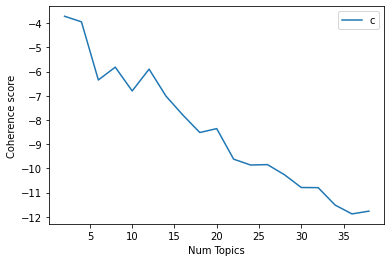

In [357]:
model_list, coherence_values = compute_coherence_values(dictionary=TextCleanWords, corpus=TextCleanWordsCorpus, texts=doc_list, start=2, limit=40, step=2)
# Show graph

limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
plt.savefig('Figure 2.pdf')

This way I have fitted my model iterately with my data by increasing the number of topics.

Even though the more accurate the model, the better, however, the high accuracy increases the complexity simultaneously. Therefore, a tradeoff between accuracy and complexity (hard to interpret).
As suggested, I take 9 topics.

## K) The final model for topic modelling

In [358]:
ldamodel5Topics = gensim.models.ldamodel.LdaModel(corpus=TextCleanWordsCorpus, num_topics=5,id2word=TextCleanWords)

In [359]:
# Compute Coherence Score using UMass
ldamodel5TopicsCoherenceModel = CoherenceModel(model=ldamodel5Topics, texts=doc_list, dictionary=TextCleanWords, coherence="u_mass")
coherence_lda = ldamodel5TopicsCoherenceModel.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  -5.670054791413158


In [360]:
# coherenec for each single topic 
ldamodel5TopicsCoherenceModel.get_coherence_per_topic()

[-6.707099165623775,
 -2.6318293470569865,
 -3.442103846209141,
 -4.684949656070181,
 -10.884291942105706]

In [361]:
ldamodel5Topics.print_topics() 

[(0,
  '0.027*"packaging" + 0.024*"store" + 0.022*"removing" + 0.019*"found" + 0.018*"return" + 0.016*"product" + 0.013*"widely" + 0.010*"scheme" + 0.010*"piece" + 0.009*"sources"'),
 (1,
  '0.068*"packaging" + 0.027*"recyclable" + 0.026*"waste" + 0.022*"reducing" + 0.017*"hard" + 0.017*"recycle" + 0.017*"reduce" + 0.017*"read" + 0.016*"committed" + 0.014*"working"'),
 (2,
  '0.023*"touch" + 0.023*"use" + 0.022*"getting" + 0.019*"bags" + 0.018*"feedback" + 0.012*"products" + 0.012*"single" + 0.010*"help" + 0.009*"remove" + 0.009*"tonnes"'),
 (3,
  '0.036*"use" + 0.033*"recycling" + 0.026*"bags" + 0.017*"currently" + 0.015*"recycled" + 0.013*"recycle" + 0.013*"understand" + 0.013*"stores" + 0.008*"website" + 0.008*"customers"'),
 (4,
  '0.042*"plasticpollutes" + 0.037*"pollution" + 0.022*"reviewing" + 0.020*"chain" + 0.019*"reductions" + 0.019*"moves" + 0.018*"extra" + 0.011*"breakfreefromplastic" + 0.011*"waste" + 0.011*"material"')]

5 Topics:

1) return to store because of plastic pieces found in the food or so(companies), plastic packaging found widely in sea, in animal's bodies (other stakeholders) # diverse, but different mesagge when differencing between stakeholders

2) reduce plastic waste, committed to working on substituting plastic packages with recycleable ones # mainly from companies, esp. Tesco 

3) pass feedback regarding reducing plastics to their teams --> listen for advice (companies), ban plastic, single-used bags -->emphasize the damange of plastic pollution (other stakeholders) 

4) hope customers understand the efforst and limitations in the process of recycling and reducing plastics (companies), promote recylcing and anti-plastic business (other)

5) promote plastic-free #diverse, but mainly from stakeholders other than companies

In [362]:
# why different results??? try to run it 2 times more!

In [363]:
ldamodel5Topics.save('./5Topics.lda')

## L) Test of my topic modelling engine

In [364]:
ExampleTest=df['Text'].iloc[0]

In [365]:
ExampleTest

"All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y"

In [366]:
ldamodel5Topics.get_document_topics(TextCleanWords.doc2bow(nlp(ExampleTest)),minimum_probability=0.00001)

[(0, 0.060095586),
 (1, 0.059968654),
 (2, 0.0600407),
 (3, 0.060002867),
 (4, 0.7598922)]

## M) Compute topics for each tweet

In [367]:
df['Text_Topics']=df['Text'].apply(lambda x: ldamodel5Topics.get_document_topics(TextCleanWords.doc2bow(nlp(x)),minimum_probability=0.00001))

In [368]:
df.sample()

,UserName,Text,Date,Retweets,Favorites,stakeHolder,is_retweet,mentioned,hashtags,Text_Topics
40390,Greenpeace,"Every day, people around the world are finding the real answer to the plastic pollution crisis, an answer that companies have so far failed to implement: REDUCE and REUSE. Now we need companies to scale up the solutions we’ve already been using! 👉 https://act.gp/2VIiZSl",2019-10-15 18:10:05+00:00,42,103,NGO,False,[],[],"[(0, 0.09255247), (1, 0.51253664), (2, 0.011393433), (3, 0.011457553), (4, 0.37205988)]"


In [472]:
Topics=pd.DataFrame(df['Text_Topics'].tolist(), index=df.index,columns=['topic1','topic2','topic3','topic4','topic5'])

In [473]:
Topics=Topics.applymap(lambda x: x[1])

In [474]:
dfWithTopics=pd.concat([df, Topics], axis=1)

In [492]:
dfWithTopics.head(10)

UserName  \
stakeHolder Date                                         
Activist    2008-07-14 21:35:34+00:00     Anna_Cummins   
            2008-07-19 15:34:17+00:00  PlasticfreeBeth   
            2008-07-19 20:50:56+00:00  PlasticfreeBeth   
            2008-07-21 03:00:33+00:00  PlasticfreeBeth   
            2008-07-24 18:31:11+00:00  PlasticfreeBeth   
            2008-07-24 22:08:41+00:00  PlasticfreeBeth   
            2008-07-25 04:45:35+00:00  PlasticfreeBeth   
            2008-07-25 19:00:48+00:00  PlasticfreeBeth   
            2008-07-27 15:28:25+00:00  PlasticfreeBeth   
            2008-07-28 02:00:56+00:00  PlasticfreeBeth   

                                                                                                                                                                             Text  \
stakeHolder Date                                                                                                                                                                    
Activist    2008-07-14 21:35:34+00:00                                                         All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y   
            2008-07-19 15:34:17+00:00                                                                         #blogher08 Gr8 recycling room but 2 bad so much disposable plastic.   
            2008-07-19 20:50:56+00:00                                                                      #blogher08 Found out lunch containers are compostable PLA not plastic.   
            2008-07-21 03:00:33+00:00               Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx   
            2008-07-24 18:31:11+00:00               Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl   
            2008-07-24 22:08:41+00:00                                           @organicmania Basil turning black in a plastic bag... another reason to skip the plastic. Hurray!   
            2008-07-25 04:45:35+00:00                                     @fishlamp Thanks for writing about the Brita recycling campaign on your blog: http://tinyurl.com/5rf85e   
            2008-07-25 19:00:48+00:00               Blue Sky Cleaners: Non-toxic and Plastic-free?: Nowadays, I stick to buying clothes that can be w.. http://tinyurl.com/6kxzyt   
            2008-07-27 15:28:25+00:00  Michael's so in love with our friends' plastic cat litter scoop, he wants to marry it. Gotta find a non-plastic scoop that's just as good.   
            2008-07-28 02:00:56+00:00               Year 2, Week 6 Results: .2 oz of plastic waste.: I took my mini plastic stash (.2 ounces! Yes!) o.. http://tinyurl.com/5aq8pw   

                                       Retweets  Favorites  is_retweet  \
stakeHolder Date                                                         
Activist    2008-07-14 21:35:34+00:00         0          0       False   
            2008-07-19 15:34:17+00:00         0          0       False   
            2008-07-19 20:50:56+00:00         0          0       False   
            2008-07-21 03:00:33+00:00         0          0       False   
            2008-07-24 18:31:11+00:00         0          0       False   
            2008-07-24 22:08:41+00:00         0          0       False   
            2008-07-25 04:45:35+00:00         0          0       False   
            2008-07-25 19:00:48+00:00         0          0       False   
            2008-07-27 15:28:25+00:00         0          0       False   
            2008-07-28 02:00:56+00:00         0          0       False   

                                             mentioned      hashtags  \
stakeHolder Date                                                       
Activist    2008-07-14 21:35:34+00:00               []            []   
            2008-07-19 15:34:17+00:00               []  [#blogher08]   

In [476]:
del dfWithTopics['Text_Topics']

In [477]:
dfWithTopics.reset_index(inplace = True)

In [478]:
del dfWithTopics['index']

In [479]:
from datetime import datetime, timedelta
dfWithTopics['Date'] = pd.to_datetime(dfWithTopics['Date'], format='%Y-%m-%d %H:%M:%S')

In [480]:
added_seconds = timedelta(0, 38)

In [481]:
dfWithTopics.set_index(['stakeHolder','Date'],inplace = True)

In [482]:
dfWithTopics.index.is_unique

False

In [483]:

dfWithTopics.index.duplicated(keep='first').sum()

77

In [484]:
dfWithTopics['check_duplicates']=dfWithTopics.index.duplicated()

In [485]:
dfWithTopics.reset_index(inplace = True)

In [486]:
dfWithTopics['Date'][dfWithTopics['check_duplicates']==1]=dfWithTopics['Date']+added_seconds

In [487]:
dfWithTopics.set_index(['stakeHolder','Date'],inplace = True)

In [488]:
dfWithTopics.index.is_unique

False

In [489]:
dfWithTopics.index.duplicated(keep='first').sum()

1

In [490]:
dfWithTopics[dfWithTopics.index.duplicated(keep='first')]

,,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,check_duplicates
stakeHolder,Date,,,,,,,,,,,,,
NGO,2020-06-10 18:56:55+00:00,HealTheBay,The CA Recycling and Plastic Pollution Reduction Act is on track to qualify for the 2022 state ballot thanks to hundreds of thousands of signatures. It would require a 25% reduction of single-use plastic by 2030 AND hold Big Plastic financially accountable for its pollution.(2/5),3,10,False,[],[],0.013372,0.013408,0.297875,0.518305,0.157039,True


In [491]:
dfWithTopics['check2']=dfWithTopics.index.duplicated(keep='first')

In [493]:
dfWithTopics.reset_index(inplace = True)

In [494]:
dfWithTopics['Date'][dfWithTopics['check2']==1]=dfWithTopics['Date']+added_seconds

In [495]:
dfWithTopics.set_index(['stakeHolder','Date'],inplace = True)

In [496]:
dfWithTopics.index.is_unique

True

In [497]:
del dfWithTopics['check2']
del dfWithTopics['check_duplicates']

In [47]:
dfWithTopics.sort_values('topic5',ascending=False).head(60)

,stakeHolder,Date,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2
31617,NGO,2019-06-30 18:02:42+00:00,PlasticPollutes,Tomorrow kicks off Plastic Free July! Take the challenge and join 120 million people with a shared vision of a world free from plastic pollution. Take the challenge here: http://ow.ly/6ilH30p2jT4 #plasticpollutes #plasticfreefjuly,31,61,False,[],"['#plasticpollutes', '#plasticfreefjuly']",0.014336,0.014334,0.014464,0.014350,0.942515,0.942515,5.0
36227,NGO,2020-02-09 16:59:31+00:00,PlasticPollutes,"More than a million conservationists from all over Uganda will march on streets of Kampala on Thursday, February 13 to reinforce the campaign on plastic pollution and to stop the deluge of plastics in all-natural environments. #plasticpollutes http://ow.ly/j3Mx30qgjlw",6,18,False,[],['#plasticpollutes'],0.015656,0.015481,0.015522,0.015550,0.937791,0.937791,5.0
1509,Activist,2010-04-24 01:08:59+00:00,PlasticfreeBeth,Just finished awesome plastic-free veggie sub &amp; don't care that you don't care what I'm eating. #fb (@Genova Delicatessen &amp; Ravioli),0,0,False,['@Genova'],['#fb'],0.016826,0.016753,0.017037,0.016729,0.932654,0.932654,5.0
29157,NGO,2019-04-18 00:18:04+00:00,NatGeo,"The plastic pollution problem may be snowballing, but so is public awareness. We've been nominated in this year's #Webbys for our #PlanetOrPlastic initiative—and your vote could help us win https://on.natgeo.com/2GqGw30",670,1356,False,[],"['#Webbys', '#PlanetOrPlastic']",0.016719,0.016833,0.017134,0.016760,0.932554,0.932554,5.0
29131,NGO,2019-04-16 23:15:05+00:00,NatGeo,"The plastic pollution problem may be snowballing, but so is public awareness. We've been nominated in this year's #Webbys for our #PlanetOrPlastic initiative—and your vote could help us win https://on.natgeo.com/2UCKqPY",1081,2307,False,[],"['#Webbys', '#PlanetOrPlastic']",0.016719,0.016833,0.017151,0.016760,0.932537,0.932537,5.0
27199,Companies,2019-01-16 13:10:30+00:00,ProcterGamble,"We’re proud to be a founding member of the @EndPlasticWaste, an unprecedented collaboration to help end plastic waste in the environment. Tune in live at 9:00 am EST to hear about it: http://www.endplasticwaste.org/live #DoingGoodEveryday",16,52,False,['@EndPlasticWaste'],['#DoingGoodEveryday'],0.016771,0.017068,0.017019,0.016802,0.932340,0.932340,5.0
23972,Scientific,2018-08-17 18:20:13+00:00,EnvirHealthNews,"Interested in the world's #plastic pollution problem? We have a new, free weekly newsletter that curates the top news on plastic challenges and solutions. Sign up here:",1,1,False,[],['#plastic'],0.017019,0.017016,0.017173,0.016951,0.931840,0.931840,5.0
23495,NGO,2018-07-24 17:10:06+00:00,HealTheBay,What are we doing people? Take a look at this sad display of the endless torrent of plastic waste laying siege to once pristine beaches in the D.R. http://ow.ly/MC7B30l5nXp,9,13,False,[],[],0.017730,0.017340,0.017192,0.017165,0.930572,0.930572,5.0
3212,Scientific,2010-12-18 19:20:24+00:00,wallacejnichols,R plastic bottles slowly disappearing frm mainstream advertising due 2 increasing awareness abt the plastic pollution plague? @oceanshaman,1,1,False,['@oceanshaman'],[],0.017860,0.017833,0.017889,0.018027,0.928390,0.928390,5.0
1004,NGO,2009-12-27 16:02:27+00:00,5gyres,"RT @residearch: new approachable architect podcast, 5 gyres & plastic pollution, w/ anna and marcus . listen now, http://bit.ly/77lCy",0,0,True,[],[],0.018510,0.018482,0.018537,0.018552,0.925919,0.925919,5.0


In [509]:
dfWithTopics["analysis"] = dfWithTopics[["topic1", "topic2","topic3","topic4","topic5"]].max(axis=1)

In [512]:
dfWithTopics["analysis2"] = dfWithTopics[["topic1", "topic2","topic3","topic4","topic5"]].max(axis=1)

In [513]:
dfWithTopics

UserName  \
stakeHolder Date                                         
Activist    2008-07-14 21:35:34+00:00     Anna_Cummins   
            2008-07-19 15:34:17+00:00  PlasticfreeBeth   
            2008-07-19 20:50:56+00:00  PlasticfreeBeth   
            2008-07-21 03:00:33+00:00  PlasticfreeBeth   
            2008-07-24 18:31:11+00:00  PlasticfreeBeth   
...                                                ...   
Companies   2020-06-29 18:40:06+00:00            Tesco   
Scientific  2020-06-29 19:40:10+00:00  EnvirHealthNews   
NGO         2020-06-29 21:01:23+00:00           5gyres   
Companies   2020-06-29 21:11:03+00:00            Tesco   
NGO         2020-06-29 23:50:03+00:00  PlasticPollutes   

                                                                                                                                                                                                                                                                                                                                              Text  \
stakeHolder Date                                                                                                                                                                                                                                                                                                                                     
Activist    2008-07-14 21:35:34+00:00                                                                                                                                                                                                                          All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y   
            2008-07-19 15:34:17+00:00                                                                                                                                                                                                                                          #blogher08 Gr8 recycling room but 2 bad so much disposable plastic.   
            2008-07-19 20:50:56+00:00                                                                                                                                                                                                                                       #blogher08 Found out lunch containers are compostable PLA not plastic.   
            2008-07-21 03:00:33+00:00                                                                                                                                                                                Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx   
            2008-07-24 18:31:11+00:00                                                                                                                                                                                Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl   
...                                                                                                                                                                                                                                                                                                                                            ...   
Companies   2020-06-29 18:40:06+00:00                                                                                             The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3   
Scientific  2020-06-29 19:40:10+00:00  Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plast

In [514]:
dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic1"]]=1
dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic2"]]=2
dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic3"]]=3
dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic4"]]=4
dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic5"]]=5

<ipython-input-514-fb9f2b01a9ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic1"]]=1
<ipython-input-514-fb9f2b01a9ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWithTopics["analysis2"][dfWithTopics["analysis"]==dfWithTopics["topic2"]]=2
<ipython-input-514-fb9f2b01a9ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWithTopics["analysis2"][dfWithTopic

In [520]:
dfWithTopics

UserName  \
stakeHolder Date                                         
Activist    2008-07-14 21:35:34+00:00     Anna_Cummins   
            2008-07-19 15:34:17+00:00  PlasticfreeBeth   
            2008-07-19 20:50:56+00:00  PlasticfreeBeth   
            2008-07-21 03:00:33+00:00  PlasticfreeBeth   
            2008-07-24 18:31:11+00:00  PlasticfreeBeth   
...                                                ...   
Companies   2020-06-29 18:40:06+00:00            Tesco   
Scientific  2020-06-29 19:40:10+00:00  EnvirHealthNews   
NGO         2020-06-29 21:01:23+00:00           5gyres   
Companies   2020-06-29 21:11:03+00:00            Tesco   
NGO         2020-06-29 23:50:03+00:00  PlasticPollutes   

                                                                                                                                                                                                                                                                                                                                              Text  \
stakeHolder Date                                                                                                                                                                                                                                                                                                                                     
Activist    2008-07-14 21:35:34+00:00                                                                                                                                                                                                                          All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y   
            2008-07-19 15:34:17+00:00                                                                                                                                                                                                                                          #blogher08 Gr8 recycling room but 2 bad so much disposable plastic.   
            2008-07-19 20:50:56+00:00                                                                                                                                                                                                                                       #blogher08 Found out lunch containers are compostable PLA not plastic.   
            2008-07-21 03:00:33+00:00                                                                                                                                                                                Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx   
            2008-07-24 18:31:11+00:00                                                                                                                                                                                Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl   
...                                                                                                                                                                                                                                                                                                                                            ...   
Companies   2020-06-29 18:40:06+00:00                                                                                             The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3   
Scientific  2020-06-29 19:40:10+00:00  Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plast

In [1]:
dfWithTopics.to_csv("GeneratedTopics.csv")

NameError: name 'dfWithTopics' is not defined

### for regressions (avoid to run the models above again)

In [20]:
dfWithTopics = pd.read_csv("GeneratedTopics3.csv")

In [21]:
dfWithTopics

,stakeHolder,Date,index,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2,stakeHolder2
0,Activist,2008-07-14 21:35:34+00:00,0,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,0,0,False,[],[],0.060096,0.059969,0.060041,0.060003,0.759892,0.759892,5.0,1
1,Activist,2008-07-19 15:34:17+00:00,1,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,0,0,False,[],['#blogher08'],0.041215,0.040382,0.229309,0.647091,0.042003,0.647091,4.0,1
2,Activist,2008-07-19 20:50:56+00:00,2,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,0,0,False,[],['#blogher08'],0.051197,0.285864,0.051422,0.319129,0.292388,0.319129,4.0,1
3,Activist,2008-07-21 03:00:33+00:00,3,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",0,0,False,[],[],0.033908,0.301444,0.596058,0.034710,0.033880,0.596058,3.0,1
4,Activist,2008-07-24 18:31:11+00:00,4,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,0,0,False,[],[],0.706527,0.028718,0.029758,0.205710,0.029287,0.706527,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,Companies,2020-06-29 18:40:06+00:00,37572,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,0,0,False,[],[],0.084768,0.472281,0.193667,0.157489,0.091795,0.472281,2.0,0
37573,Scientific,2020-06-29 19:40:10+00:00,37573,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",1,3,False,[],"['#plastic', '#PlasticPollution']",0.364354,0.242879,0.012002,0.011828,0.368937,0.368937,5.0,1
37574,NGO,2020-06-29 21:01:23+00:00,37574,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,1,1,False,[],[],0.040082,0.040080,0.040098,0.041382,0.838358,0.838358,5.0,1
37575,Companies,2020-06-29 21:11:03+00:00,37575,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",0,0,False,[],[],0.123878,0.196978,0.017002,0.481150,0.180992,0.481150,4.0,0


In [55]:
#dfWithTopics.sort_values('topic5',ascending=False).head(60)
dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Activist']

,analysis2
0,5.0
1,4.0
2,4.0
3,3.0
4,1.0
...,...
36670,4.0
36690,4.0
36954,5.0
37020,3.0


In [ ]:
dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Lobbyist']


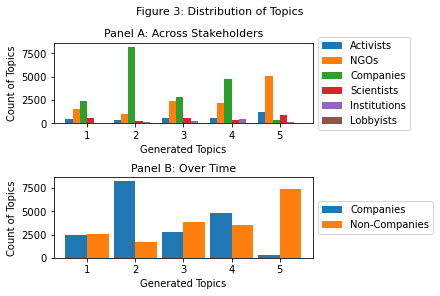

In [145]:



fig, axs = plt.subplots(2, 1, constrained_layout=True)
activist = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Activist']
NGO = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='NGO']
companies = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Companies']
scientist = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Scientific']
institution = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Institution']
lobbyist = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']=='Lobbyist']
# Create a stacked histogram here
#plt.hist([activist, NGO, companies,scientist,institution,lobbyist], stacked=True,
 #        bins=[1, 2, 3, 4, 5], rwidth=0.9, align="left")
axs[0].hist([activist, NGO, companies,scientist,institution,lobbyist],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

axs[0].legend(["Activists", "NGOs", "Companies","Scientists","Institutions","Lobbyists"],loc='center left', bbox_to_anchor=(1, 0.5))
#axs[0].xticks([1, 2, 3, 4,5])
axs[0].set_xlabel("Generated Topics")
axs[0].set_ylabel("Count of Topics")

axs[0].set_title('Panel A: Across Stakeholders', fontsize =11)
fig.suptitle('Figure 3: Distribution of Topics', fontsize=11)
#plt.subplot(2, 1, 2)
nonC = dfWithTopics['analysis2'][dfWithTopics['stakeHolder']!='Companies']
axs[1].hist([companies,nonC],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

axs[1].legend([ "Companies","Non-Companies"],loc='center left', bbox_to_anchor=(1, 0.5))
#axs[1].xticks([1, 2, 3, 4,5])
axs[1].set_xlabel("Generated Topics")
axs[1].set_ylabel("Count of Topics")
axs[1].set_title('Panel B: Over Time', fontsize =11)
#plt.title("Distribution of Topics among Companies and Non-Companies",size = "x-large")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Figure 3.pdf')

Text(0.5, 1.0, 'Distribution of Topics over Time')

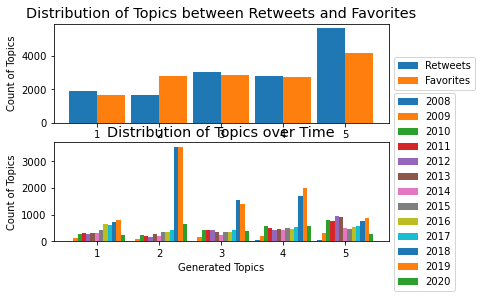

In [73]:
plt.subplot(2, 1, 1)
retweet = dfWithTopics['analysis2'][dfWithTopics['Retweets']!=0]
favorite = dfWithTopics['analysis2'][dfWithTopics['Favorites']!=0]
# Create a stacked histogram here
#plt.hist([activist, NGO, companies,scientist,institution,lobbyist], stacked=True,
 #        bins=[1, 2, 3, 4, 5], rwidth=0.9, align="left")
plt.hist([retweet, favorite],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

plt.legend(["Retweets", "Favorites"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Generated Topics")
plt.ylabel("Count of Topics")
plt.title("Distribution of Topics between Retweets and Favorites",size = "x-large")

plt.subplot(2, 1, 2)
plt.hist([Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

plt.legend(["2008", "2009", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Generated Topics")
plt.ylabel("Count of Topics")
plt.title("Distribution of Topics over Time",size = "x-large")


In [30]:
from datetime import datetime, timedelta
dfWithTopics['Date2'] = pd.to_datetime(dfWithTopics['Date'], format='%Y-%m-%d %H:%M:%S')
dfWithTopics['Date2']=dfWithTopics['Date2'].apply(lambda x: x.strftime('%Y'))



In [59]:
Y08 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2008"]
Y09 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2009"]
Y10 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2010"]
Y11 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2011"]
Y12 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2012"]
Y13 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2013"]
Y14 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2014"]
Y15 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2015"]
Y16 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2016"]
Y17 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2017"]
Y18 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2018"]
Y19 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2019"]
Y20 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2020"]

<ipython-input-146-09b5d3cd4a5c>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Panel A: Distribution of Topics over Time",Fontsize = 11)


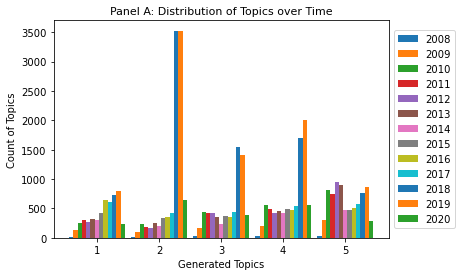

In [146]:
plt.hist([Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,Y19,Y20],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

plt.legend(["2008", "2009", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Generated Topics")
plt.ylabel("Count of Topics")
plt.title("Panel A: Distribution of Topics over Time",Fontsize = 11)
plt.savefig('Figure 4.pdf')


In [95]:
P18 = dfWithTopics[dfWithTopics['Date2']=="2018"]
P18 = P18['stakeHolder2'][P18['analysis2']==2]

P19 = dfWithTopics[dfWithTopics['Date2']=="2019"]
P19 = P19['stakeHolder2'][P19['analysis2']==2]


In [91]:
P18.sum()

188

In [92]:
len(P18)

3519

<ipython-input-149-883f01673338>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Panel B: Proportion of Companies and Non-companies for Year 2018",Fontsize = 11)


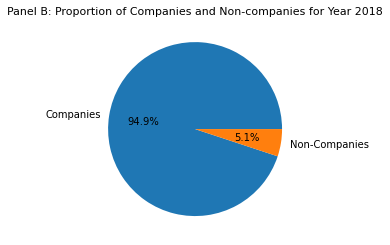

In [149]:
plt.pie([len(P18),P18.sum()],labels=["Companies","Non-Companies"],autopct='%1.1f%%')
plt.title("Panel B: Proportion of Companies and Non-companies for Year 2018",Fontsize = 11)
plt.savefig('Figure 4(b).pdf')

<ipython-input-150-5265f749cd4d>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Panel C: Proportion of Companies and Non-companies for Year 2019",Fontsize = 11)


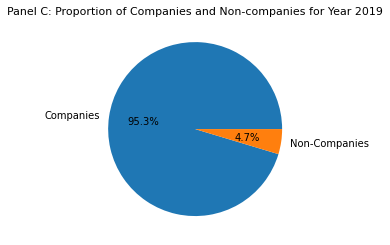

In [150]:
plt.pie([len(P19),P19.sum()],labels=["Companies","Non-Companies"],autopct='%1.1f%%')
plt.title("Panel C: Proportion of Companies and Non-companies for Year 2019",Fontsize = 11)
plt.savefig('Figure 4(c).pdf')

In [64]:
R08 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2008"]
R09 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2009"]
R10 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2010"]
R11 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2011"]
R12 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2012"]
R13 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2013"]
R14 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2014"]
R15 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2015"]
R16 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2016"]
R17 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2017"]
R18 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2018"]
R19 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2019"]
R20 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2020"]

Text(0.5, 1.0, 'Distribution of Retweets over Time')

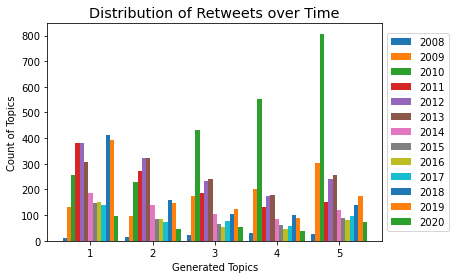

In [68]:
plt.hist([R08,R09,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

plt.legend(["2008", "2009", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Generated Topics")
plt.ylabel("Count of Topics")
plt.title("Distribution of Retweets over Time",size = "x-large")


In [66]:
F08 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2008"]
F09 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2009"]
F10 = dfWithTopics['analysis2'][dfWithTopics['Date2']=="2010"]
F11 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2011"]
F12 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2012"]
F13 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2013"]
F14 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2014"]
F15 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2015"]
F16 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2016"]
F17 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2017"]
F18 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2018"]
F19 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2019"]
F20 = dfWithTopics['Retweets'][dfWithTopics['Date2']=="2020"]

Text(0.5, 1.0, 'Distribution of Favorites over Time')

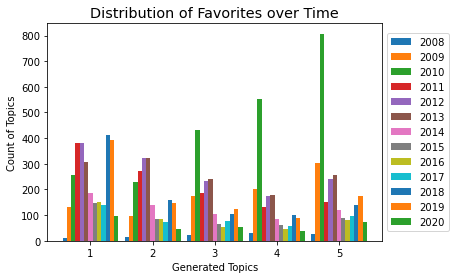

In [69]:
plt.hist([F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20],bins=[1, 2, 3, 4, 5,6], rwidth=0.9, align="left")

plt.legend(["2008", "2009", "2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1, 2, 3, 4,5])
plt.xlabel("Generated Topics")
plt.ylabel("Count of Topics")
plt.title("Distribution of Favorites over Time",size = "x-large")


In [29]:
Year2008

Series([], Name: analysis2, dtype: float64)

#sns.relplot(x="Date", y="analysis2", kind="line", data=dfWithTopics)



In [8]:
df2=dfWithTopics.reset_index()

In [19]:
df2['stakeHolder2']=dfWithTopics['stakeHolder']

In [20]:
df2

,index,stakeHolder,Date,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2,stakeHolder2
0,0,Activist,2008-07-14 21:35:34+00:00,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,0,0,False,[],[],0.060096,0.059969,0.060041,0.060003,0.759892,0.759892,5.0,Activist
1,1,Activist,2008-07-19 15:34:17+00:00,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,0,0,False,[],['#blogher08'],0.041215,0.040382,0.229309,0.647091,0.042003,0.647091,4.0,Activist
2,2,Activist,2008-07-19 20:50:56+00:00,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,0,0,False,[],['#blogher08'],0.051197,0.285864,0.051422,0.319129,0.292388,0.319129,4.0,Activist
3,3,Activist,2008-07-21 03:00:33+00:00,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",0,0,False,[],[],0.033908,0.301444,0.596058,0.034710,0.033880,0.596058,3.0,Activist
4,4,Activist,2008-07-24 18:31:11+00:00,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,0,0,False,[],[],0.706527,0.028718,0.029758,0.205710,0.029287,0.706527,1.0,Activist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,37572,Companies,2020-06-29 18:40:06+00:00,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,0,0,False,[],[],0.084768,0.472281,0.193667,0.157489,0.091795,0.472281,2.0,Companies
37573,37573,Scientific,2020-06-29 19:40:10+00:00,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",1,3,False,[],"['#plastic', '#PlasticPollution']",0.364354,0.242879,0.012002,0.011828,0.368937,0.368937,5.0,Scientific
37574,37574,NGO,2020-06-29 21:01:23+00:00,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,1,1,False,[],[],0.040082,0.040080,0.040098,0.041382,0.838358,0.838358,5.0,NGO
37575,37575,Companies,2020-06-29 21:11:03+00:00,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",0,0,False,[],[],0.123878,0.196978,0.017002,0.481150,0.180992,0.481150,4.0,Companies


In [21]:
df2['stakeHolder2'][df2['stakeHolder']!="Companies"]=1

<ipython-input-21-167e5b58732d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stakeHolder2'][df2['stakeHolder']!="Companies"]=1


In [22]:
df2['stakeHolder2'][df2['stakeHolder']=="Companies"]=0

<ipython-input-22-5ee8f4e1e553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['stakeHolder2'][df2['stakeHolder']=="Companies"]=0


In [23]:
df2

,index,stakeHolder,Date,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2,stakeHolder2
0,0,Activist,2008-07-14 21:35:34+00:00,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,0,0,False,[],[],0.060096,0.059969,0.060041,0.060003,0.759892,0.759892,5.0,1
1,1,Activist,2008-07-19 15:34:17+00:00,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,0,0,False,[],['#blogher08'],0.041215,0.040382,0.229309,0.647091,0.042003,0.647091,4.0,1
2,2,Activist,2008-07-19 20:50:56+00:00,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,0,0,False,[],['#blogher08'],0.051197,0.285864,0.051422,0.319129,0.292388,0.319129,4.0,1
3,3,Activist,2008-07-21 03:00:33+00:00,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",0,0,False,[],[],0.033908,0.301444,0.596058,0.034710,0.033880,0.596058,3.0,1
4,4,Activist,2008-07-24 18:31:11+00:00,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,0,0,False,[],[],0.706527,0.028718,0.029758,0.205710,0.029287,0.706527,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,37572,Companies,2020-06-29 18:40:06+00:00,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,0,0,False,[],[],0.084768,0.472281,0.193667,0.157489,0.091795,0.472281,2.0,0
37573,37573,Scientific,2020-06-29 19:40:10+00:00,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",1,3,False,[],"['#plastic', '#PlasticPollution']",0.364354,0.242879,0.012002,0.011828,0.368937,0.368937,5.0,1
37574,37574,NGO,2020-06-29 21:01:23+00:00,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,1,1,False,[],[],0.040082,0.040080,0.040098,0.041382,0.838358,0.838358,5.0,1
37575,37575,Companies,2020-06-29 21:11:03+00:00,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",0,0,False,[],[],0.123878,0.196978,0.017002,0.481150,0.180992,0.481150,4.0,0


In [24]:
df2.set_index(['stakeHolder','Date'],inplace = True)

In [26]:
df2.index.is_unique


True

In [27]:
df2

index         UserName  \
stakeHolder Date                                                
Activist    2008-07-14 21:35:34+00:00      0     Anna_Cummins   
            2008-07-19 15:34:17+00:00      1  PlasticfreeBeth   
            2008-07-19 20:50:56+00:00      2  PlasticfreeBeth   
            2008-07-21 03:00:33+00:00      3  PlasticfreeBeth   
            2008-07-24 18:31:11+00:00      4  PlasticfreeBeth   
...                                      ...              ...   
Companies   2020-06-29 18:40:06+00:00  37572            Tesco   
Scientific  2020-06-29 19:40:10+00:00  37573  EnvirHealthNews   
NGO         2020-06-29 21:01:23+00:00  37574           5gyres   
Companies   2020-06-29 21:11:03+00:00  37575            Tesco   
NGO         2020-06-29 23:50:03+00:00  37576  PlasticPollutes   

                                                                                                                                                                                                                                                                                                                                              Text  \
stakeHolder Date                                                                                                                                                                                                                                                                                                                                     
Activist    2008-07-14 21:35:34+00:00                                                                                                                                                                                                                          All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y   
            2008-07-19 15:34:17+00:00                                                                                                                                                                                                                                          #blogher08 Gr8 recycling room but 2 bad so much disposable plastic.   
            2008-07-19 20:50:56+00:00                                                                                                                                                                                                                                       #blogher08 Found out lunch containers are compostable PLA not plastic.   
            2008-07-21 03:00:33+00:00                                                                                                                                                                                Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx   
            2008-07-24 18:31:11+00:00                                                                                                                                                                                Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl   
...                                                                                                                                                                                                                                                                                                                                            ...   
Companies   2020-06-29 18:40:06+00:00                                                                                             The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3   
Scientific  2020-06-29 19:40:10+00:00  Yikes! Did you know that the fruits and veggies we eat can absorb microplast

In [583]:
df2.index.duplicated(keep='first').sum()

1

In [584]:
df2[df2.index.duplicated(keep='first')]

,,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2
stakeHolder,Date,,,,,,,,,,,,,,
1,2011-06-02 23:08:12+00:00,Maqueda,RT @PlasticPollutes: RT @BlooSee: Suja Lowenthal: plastic pollution in LA http://bloosee.com/r/i3GLUzp #BlueMind,0,0,True,[],[#BlueMind],0.100043,0.100025,0.100242,0.100014,0.599675,0.599675,5.0


In [585]:
df2['check2']=df2.index.duplicated(keep='first')

In [589]:
df2.reset_index(inplace=True)

In [590]:
df2['Date'][df2['check2']==True]=df2['Date']+added_seconds

In [591]:
df2

,stakeHolder,Date,UserName,Text,Retweets,Favorites,is_retweet,mentioned,hashtags,topic1,topic2,topic3,topic4,topic5,analysis,analysis2,check2
0,1,2008-07-14 21:35:34+00:00,Anna_Cummins,All the plastic JUNK in one bird's stomach....appetizing. http://tinyurl.com/5dch2y,0,0,False,[],[],0.060096,0.059969,0.060041,0.060003,0.759892,0.759892,5.0,False
1,1,2008-07-19 15:34:17+00:00,PlasticfreeBeth,#blogher08 Gr8 recycling room but 2 bad so much disposable plastic.,0,0,False,[],[#blogher08],0.041215,0.040382,0.229309,0.647091,0.042003,0.647091,4.0,False
2,1,2008-07-19 20:50:56+00:00,PlasticfreeBeth,#blogher08 Found out lunch containers are compostable PLA not plastic.,0,0,False,[],[#blogher08],0.051197,0.285864,0.051422,0.319129,0.292388,0.319129,4.0,False
3,1,2008-07-21 03:00:33+00:00,PlasticfreeBeth,"Year 2, Week 5 Results: 1.4 oz of plastic waste.: This post will be short because I want to get i.. http://tinyurl.com/699nrx",0,0,False,[],[],0.033908,0.301444,0.596058,0.034710,0.033880,0.596058,3.0,False
4,1,2008-07-24 18:31:11+00:00,PlasticfreeBeth,Blue Chair Fruit Company: plastic-free at the farmer's market: Our Temescal farmer's market was b.. http://tinyurl.com/6rl6pl,0,0,False,[],[],0.706527,0.028718,0.029758,0.205710,0.029287,0.706527,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37572,0,2020-06-29 18:40:06+00:00,Tesco,The plastic option is only there to support our supply base. It is fully recyclable and just a temporary solution to help us and our customers. I hope that my answer has been helpful. Kind regards - Lenka 3/3,0,0,False,[],[],0.084768,0.472281,0.193667,0.157489,0.091795,0.472281,2.0,False
37573,1,2020-06-29 19:40:10+00:00,EnvirHealthNews,"Yikes! Did you know that the fruits and veggies we eat can absorb microplastics through their roots?! 😵 Never miss another headline like this about the world's growing #plastic crisis. Sign up for our free, weekly #PlasticPollution newsletter. https://www.ehn.org/st/Subscribe_to_Into_the_Plasticene",1,3,False,[],"[#plastic, #PlasticPollution]",0.364354,0.242879,0.012002,0.011828,0.368937,0.368937,5.0,False
37574,1,2020-06-29 21:01:23+00:00,5gyres,Co-Founders Marcus and Anna chat with AltaSea about their experiences with the plastic pollution movement.,1,1,False,[],[],0.040082,0.040080,0.040098,0.041382,0.838358,0.838358,5.0,False
37575,0,2020-06-29 21:11:03+00:00,Tesco,"Hello Rachel, this is a temporary measure and some stores are taking part in a trial to reduce the amount of bags being used. You can recycle plastic bags in our superstore or extras :) Thanks, Clarice",0,0,False,[],[],0.123878,0.196978,0.017002,0.481150,0.180992,0.481150,4.0,False


In [592]:
df2.set_index(['stakeHolder','Date'],inplace = True)

In [593]:
df2.index.is_unique

True

In [595]:
del df2['check2']

In [28]:
df2.to_csv("GeneratedTopics3.csv")